In [1]:
%matplotlib inline
import pandas as pd
"""
Demo using fontdict to control style of text and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

idx = pd.IndexSlice



In [2]:
poblacion = pd.read_csv('demo_r_d2jan_1_Data.csv',sep=';',index_col=['Flag and Footnotes'])

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y')
#datos = pd.read_csv('https://covid19.isciii.es/resources/serie_historica_acumulados.csv',
datos = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/agregados.csv',
            encoding = "ISO-8859-1",
            index_col=[1,0],
            parse_dates=[1],
            infer_datetime_format=True,
            #date_parser=dateparse,
            #dayfirst=True,# yearfirst=False
            )#[:-5]
#datos.sort_index([0,1])
#datos.sort_values(['CCAA','FECHA'],inplace=True)

datos.tail(15)

CASOS     PCR+  \
FECHA      CCAA                                                                 
2020-05-09 GA                                                    NaN   9253.0   
           MD                                                    NaN  64787.0   
           ML                                                    NaN    119.0   
           MC                                                    NaN   1508.0   
           NC                                                    NaN   5052.0   
           PV                                                    NaN  13156.0   
           RI                                                    NaN   4008.0   
NaT        NOTA 1: El objetivo de los datos que se publica...    NaN      NaN   
           NOTA 2: Los datos de estas comunidades son dato...    NaN      NaN   
           * Desde el día 17/04/2020 las cifras de UCIs de...    NaN      NaN   
           **Desde el día 28/04/2020 las cifras  UCIs de G...    NaN      NaN   
           *** Desde el día 11/04/2020 las cifras de hospi...    NaN      NaN   
           *** Desde el día 12/04/2020 las cifras de UCIs ...    NaN      NaN   
           **** Desde el día 26/04/2020 las cifras de Hosp...    NaN      NaN   
           NOTA 3:Se excluyen de la serie las notificacion...    NaN      NaN   

                                                               TestAc+  \
FECHA      CCAA                                                          
2020-05-09 GA                                                   1389.0   
           MD                                                   4875.0   
           ML                                                     13.0   
           MC                                                    821.0   
           NC                                                   2403.0   
           PV                                                   4521.0   
           RI                                                   1370.0   
NaT        NOTA 1: El objetivo de los datos que se publica...      NaN   
           NOTA 2: Los datos de estas comunidades son dato...      NaN   
           * Desde el día 17/04/2020 las cifras de UCIs de...      NaN   
           **Desde el día 28/04/2020 las cifras  UCIs de G...      NaN   
           *** Desde el día 11/04/2020 las cifras de hospi...      NaN   
           *** Desde el día 12/04/2020 las cifras de UCIs ...      NaN   
           **** Desde el día 26/04/2020 las cifras de Hosp...      NaN   
           NOTA 3:Se excluyen de la serie las notificacion...      NaN   

                                                               Hospitalizados  \
FECHA      CCAA                                                                 
2020-05-09 GA                                                          2886.0   
           MD                                                         41559.0   
           ML                                                            44.0   
           MC                                                           662.0   
           NC                                                          2023.0   
           PV                                                          6902.0   
           RI                                                          1474.0   
NaT        NOTA 1: El objetivo de los datos que se publica...             NaN   
           NOTA 2: Los datos de estas comunidades son dato...             NaN   
           * Desde el día 17/04/2020 las cifras de UCIs de...             NaN   
           **Desde el día 28/04/2020 las cifras  UCIs de G...             NaN   
           *** Desde el día 11/04/2020 las cifras de hospi...             NaN   
           *** Desde el día 12/04/2020 las cifras de UCIs ...             NaN   
           **** Desde el día 26/04/2020 las cifras de Hosp...             NaN   
           NOTA 3:Se excluyen de la serie las notificacion...             NaN   

                                                

In [4]:
datos = datos[:-8]
#display(datos.loc[idx['2020-04-28','GA'],:])
datos.loc[idx['2020-04-28','GA'],'CASOS'] = np.nan
#kk = datos.at[idx['2020-04-28','GA'],'Fallecidos'] - 125
#datos.loc[idx['2020-04-28','GA'],'Fallecidos'] = kk

datos['Total'] = datos['CASOS']
datos.loc[:,'Total'] = datos.Total.fillna(datos['PCR+'])
#datos['Total'] = datos[['CASOS','PCR+']].sum(axis=1)
datos['DTotal'] = datos.Total.groupby(by='CCAA').diff()
datos['DFallecidos'] = datos.Fallecidos.groupby(by='CCAA').diff()
datos['DRecuperados'] = datos.Recuperados.groupby(by='CCAA').diff()
datos.tail(38)
#datos.loc[idx['2020-04-28':]]

CASOS     PCR+  TestAc+  Hospitalizados     UCI  Fallecidos  \
FECHA      CCAA                                                                
2020-05-08 AN      NaN  12298.0   2930.0          6069.0   745.0      1317.0   
           AR      NaN   5291.0   1365.0          2583.0   263.0       823.0   
           AS      NaN   2342.0    841.0          2166.0   145.0       293.0   
           IB      NaN   1944.0     98.0          1141.0   169.0       207.0   
           CN      NaN   2250.0      0.0           935.0   178.0       148.0   
           CB      NaN   2241.0    440.0          1023.0    79.0       201.0   
           CM      NaN  16278.0   7015.0          8867.0   621.0      2738.0   
           CL      NaN  17807.0   5630.0          8394.0   546.0      1885.0   
           CT      NaN  51935.0   1643.0         28687.0  2983.0      5507.0   
           CE      NaN    110.0     59.0            11.0     4.0         4.0   
           VC      NaN  10661.0   3015.0          5317.0   709.0      1315.0   
           EX      NaN   2907.0    979.0          1695.0   109.0       477.0   
           GA      NaN   9216.0   1358.0          2876.0   323.0       591.0   
           MD      NaN  64714.0   4852.0         41436.0  3508.0      8598.0   
           ML      NaN    119.0     13.0            44.0     3.0         2.0   
           MC      NaN   1506.0    757.0           662.0   113.0       138.0   
           NC      NaN   5039.0   2403.0          2021.0   135.0       487.0   
           PV      NaN  13111.0   4442.0          6865.0   568.0      1403.0   
           RI      NaN   4000.0   1365.0          1473.0    91.0       344.0   
2020-05-09 AN      NaN  12315.0   3088.0          6080.0   745.0      1320.0   
           AR      NaN   5316.0   1386.0          2588.0   263.0       824.0   
           AS      NaN   2343.0    854.0          2185.0   147.0       295.0   
           IB      NaN   1950.0    105.0          1141.0   169.0       209.0   
           CN      NaN   2258.0      0.0           935.0   178.0       148.0   
           CB      NaN   2244.0    440.0          1028.0    79.0       201.0   
           CM      NaN  16343.0   7319.0          8895.0   623.0      2759.0   
           CL      NaN  17917.0   5869.0          8468.0   546.0      1897.0   
           CT      NaN  52086.0   1643.0         28784.0  2991.0      5532.0   
           CE      NaN    110.0     59.0            11.0     4.0         4.0   
           VC      NaN  10713.0   3127.0          5354.0   716.0      1323.0   
           EX      NaN   2912.0    991.0          1711.0   109.0       480.0   
           GA      NaN   9253.0   1389.0          2886.0   325.0       592.0   
           MD      NaN  64787.0   4875.0         41559.0  3520.0      8644.0   
           ML      NaN    119.0     13.0            44.0     3.0         2.0   
           MC      NaN   1508.0    821.0           662.0   113.0       139.0   
           NC      NaN   5052.0   2403.0          2023.0   135.0       488.0   
           PV      NaN  13156.0   4521.0          6902.0   571.0      1418.0   
           RI      NaN   4008.0   1370.0          1474.0    91.0       346.0   

                 Recuperados    Total  DTotal  DFallecidos  DRecuperados  
FECHA      CCAA                                                           
2020-05-08 AN         8779.0  12298.0    11.0         16.0         344.0  
           AR         3006.0   5291.0    17.0          8.0          53.0  
           AS         1012.0   2342.0     6.0          1.0          29.0  
           IB         1395.0   1944.0     9.0          5.0          21.0  
           CN         1342.0   2250.0    10.0          0.0          24.0  
           CB         1862.0   2241.0     9.0          0.0          76.0  
           CM         6062.0  16278.0    41.0         25.0          81.0  
           CL         7317.0  17807.0    91.0          9.0          86.0  
           CT        24063.0  51935.0   202.0         36.0        

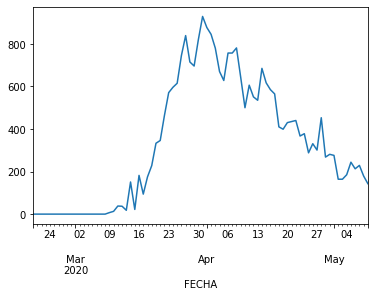

In [5]:
datos.groupby('FECHA').sum().DFallecidos.plot()

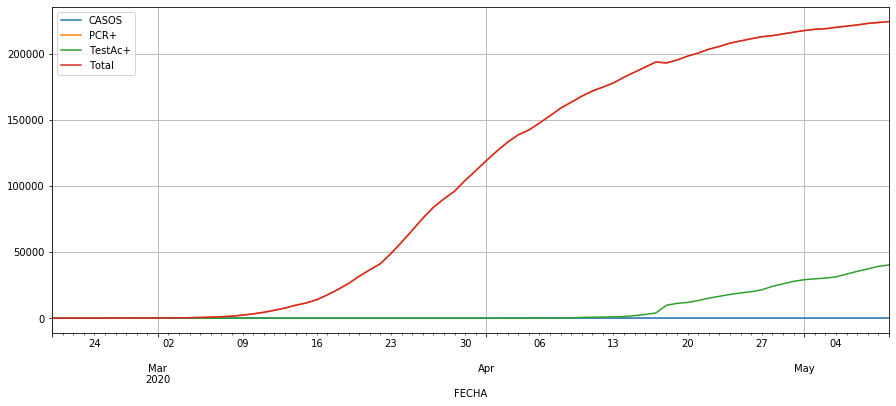

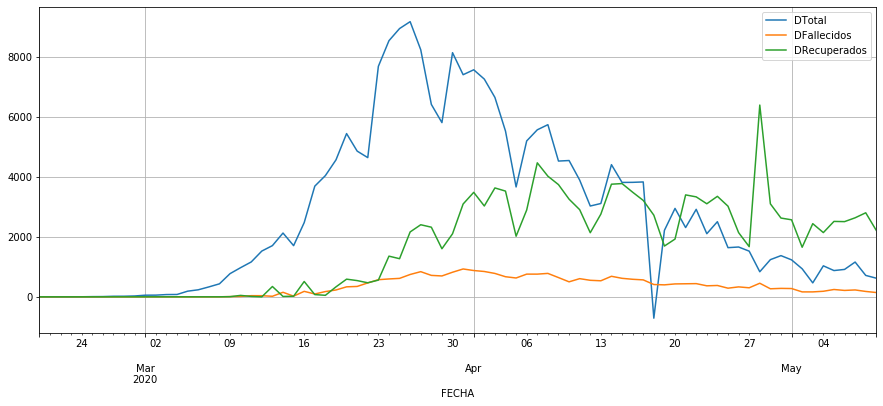

In [6]:
kv = datos.groupby('FECHA').sum()#.loc['AR']#.dropna()
#kv['Total'] = kv[['CASOS','PCR+']].sum(axis=1)
#kv['DTotal'] = np.gradient(kv.Total)
#kv['DFallecidos'] = np.gradient(kv.Fallecidos)
#kv['DRecuperados'] = np.gradient(kv.Recuperados)

fig, ax = plt.subplots(figsize=(15,6))
kv[['CASOS']].plot(ax=ax)
kv[['PCR+']].plot(ax=ax)
kv[['TestAc+']].plot(ax=ax)
kv[['Total']].plot(ax=ax)
plt.grid()
plt.show()


fig, ax = plt.subplots(figsize=(15,6))
kv[['DTotal']].plot(ax=ax)
kv[['DFallecidos']].plot(ax=ax)
kv[['DRecuperados']].plot(ax=ax)
plt.grid()

In [7]:
kv

CASOS      PCR+  TestAc+  Hospitalizados      UCI  Fallecidos  \
FECHA                                                                       
2020-02-20    0.0       2.0      0.0            26.0      0.0         0.0   
2020-02-21    0.0       2.0      0.0            30.0      1.0         0.0   
2020-02-22    0.0       2.0      0.0            33.0      1.0         0.0   
2020-02-23    0.0       2.0      0.0            38.0      2.0         0.0   
2020-02-24    0.0       3.0      0.0            49.0      2.0         0.0   
...           ...       ...      ...             ...      ...         ...   
2020-05-05    0.0  220981.0  33362.0        120466.0  11082.0     25857.0   
2020-05-06    0.0  221895.0  35408.0        121014.0  11137.0     26070.0   
2020-05-07    0.0  223055.0  37260.0        121776.0  11222.0     26299.0   
2020-05-08    0.0  223769.0  39205.0        122265.0  11292.0     26478.0   
2020-05-09    0.0  224390.0  40273.0        122730.0  11328.0     26621.0   

            Recuperados     Total  DTotal  DFallecidos  DRecuperados  
FECHA                                                                 
2020-02-20          0.0       2.0     0.0          0.0           0.0  
2020-02-21          0.0       2.0     0.0          0.0           0.0  
2020-02-22          0.0       2.0     0.0          0.0           0.0  
2020-02-23          0.0       2.0     0.0          0.0           0.0  
2020-02-24          0.0       3.0     1.0          0.0           0.0  
...                 ...       ...     ...          ...           ...  
2020-05-05     126002.0  220981.0   876.0        244.0        2516.0  
2020-05-06     128511.0  221895.0   914.0        213.0        2509.0  
2020-05-07     131148.0  223055.0  1160.0        229.0        2637.0  
2020-05-08     133952.0  223769.0   714.0        179.0        2804.0  
2020-05-09     136166.0  224390.0   621.0        143.0        2214.0  

[80 rows x 11 columns]

In [8]:
indices = kv.index[kv.index.weekday <= 5]
[kv.index,[i.day_name() for i in kv.index]]


[DatetimeIndex(['2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
                '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
                '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
                '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
                '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
                '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
                '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
                '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
                '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
                '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
                '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
                '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
                '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
                '2020-04-12', '2020-04-13', '2020-04-14', '2020-

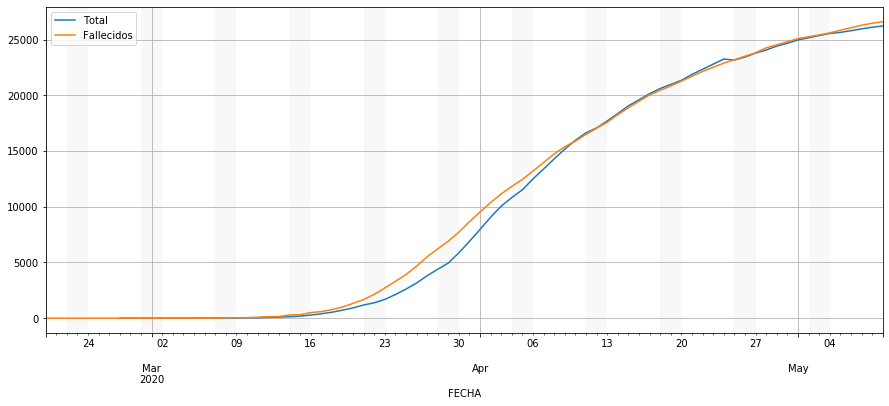

In [9]:
def find_weekend_indices(datetime_array):
    indices=[]
    for i in range(len(datetime_array)-1):
        if datetime_array[i].day_name() in ['Saturday', 'Sunday']:
            indices.append(i)
    return indices

weekend_indices = find_weekend_indices(kv.index)

def highlight_datetimes(indices, ax,items=True):
    i = 0
    while i < len(indices):
        ax.axvspan(kv.index[indices[i]], kv.index[indices[i] + 1], facecolor='gray', edgecolor='none', alpha=.05)
        i += 1
    if items:
        ax.axvline(x=dt.datetime(2020, 3, 8),ls='--',linewidth=4, color='purple',alpha=.4,label='Manifestación y Vox')
        ax.axvline(x=dt.datetime(2020, 3, 9),linewidth=4, color='green',alpha=.4,label='PV y MD Educativo')
        ax.axvline(x=dt.datetime(2020, 3, 12),linewidth=4, color='yellow',alpha=.4,label='AR Educativo')
        ax.axvline(x=dt.datetime(2020, 3, 15),linewidth=4, color='r',alpha=.4,label='Estado de alarma')
        ax.axvline(x=dt.datetime(2020, 3, 28),linewidth=4, color='brown',alpha=.4,label='Servicios no esenciales')
        ax.axvline(x=dt.datetime(2020, 4, 26),ls='--',linewidth=4, color='orange',alpha=.4,label='Niños a la calle')
        ax.axvline(x=dt.datetime(2020, 5, 2),ls='--',linewidth=4, color='lightblue',alpha=.4,label='Deporte y salidas controladas')


        

fig, ax = plt.subplots(figsize=(15,6))
(kv[['Total']].shift(7)*.12).plot(ax=ax)
(kv[['Fallecidos']]).plot(ax=ax)
highlight_datetimes(weekend_indices, ax,items=False)
plt.legend()
plt.grid()

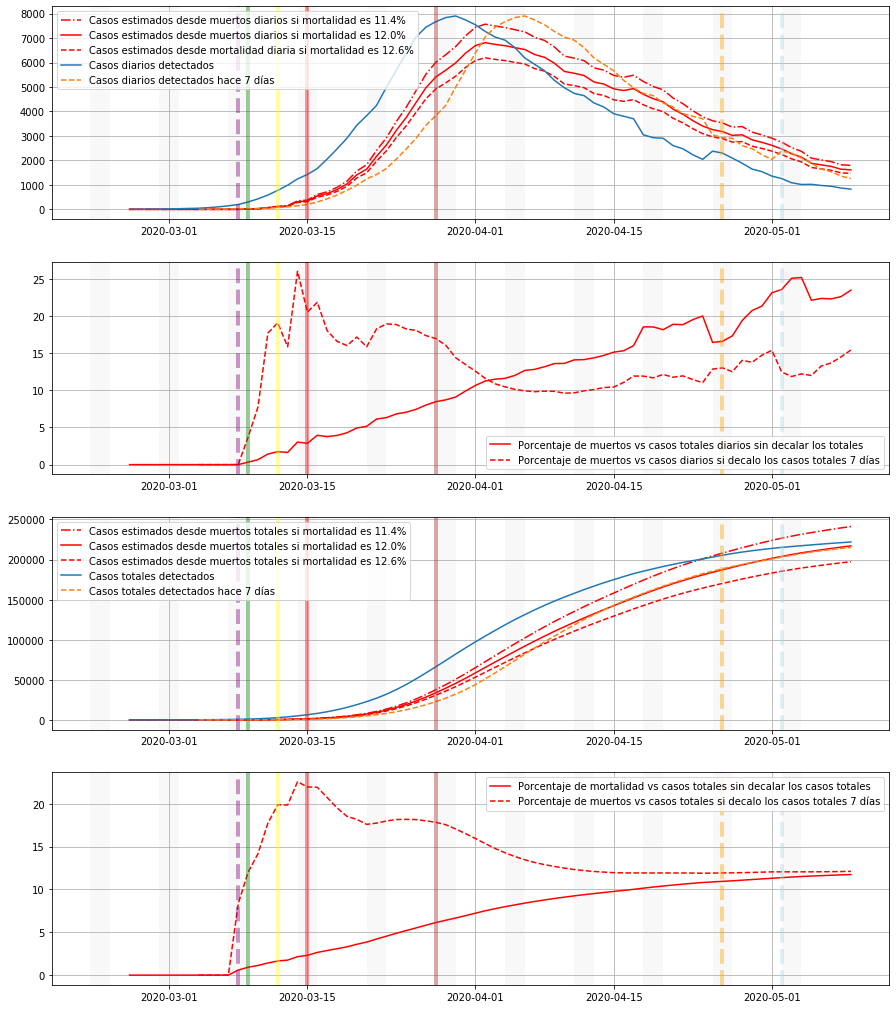

In [10]:
diasRetraso = 7
porcenMorta = 12

fig, ax = plt.subplots(4,figsize=(15,18))
ax[0].plot(kv.index,
        (kv[['DFallecidos']].rolling(7).mean()/(porcenMorta*.9/100.)),'-.',
         label='Casos estimados desde muertos diarios si mortalidad es {:.1f}%'.format(porcenMorta*.95),color='r')
ax[0].plot(kv.index,
        (kv[['DFallecidos']].rolling(7).mean()/(porcenMorta/100.)),
         label='Casos estimados desde muertos diarios si mortalidad es {:.1f}%'.format(porcenMorta),color='r')
ax[0].plot(kv.index,
        (kv[['DFallecidos']].rolling(7).mean()/(porcenMorta*1.1/100.)),'--',
         label='Casos estimados desde mortalidad diaria si mortalidad es {:.1f}%'.format(porcenMorta*1.05),color='r')
ax[0].plot(kv.index,kv[['DTotal']].rolling(7).mean(),label='Casos diarios detectados')
ax[0].plot(kv.index,kv[['DTotal']].rolling(7).mean().shift(diasRetraso),'--',
        label='Casos diarios detectados hace {} días'.format(diasRetraso))
#(kv[['DTotal']].rolling(7).mean()).plot(ax=ax)
#(kv[['DTotal']].rolling(7).mean().shift(7)).plot(ax=ax)
ax[0].legend()
ax[0].grid()
highlight_datetimes(weekend_indices, ax[0])


ax[1].plot(kv.index,
           (kv['DFallecidos'].rolling(7).mean()/kv['DTotal'].rolling(7).mean()*100.),
           color='r',
           label='Porcentaje de muertos vs casos totales diarios sin decalar los totales'.format(diasRetraso),
          )
ax[1].plot(kv.index,
           (kv['DFallecidos'].rolling(7).mean()/(kv['DTotal'].rolling(7).mean().shift(diasRetraso))*100.),
           '--',color='r',
           label='Porcentaje de muertos vs casos diarios si decalo los casos totales {} días'.format(diasRetraso),
          )
ax[1].grid()
ax[1].legend()
highlight_datetimes(weekend_indices, ax[1])

ax[2].plot(kv.index,
        (kv[['Fallecidos']].rolling(7).mean()/(porcenMorta*.9/100.)),'-.',
         label='Casos estimados desde muertos totales si mortalidad es {:.1f}%'.format(porcenMorta*.95),color='r')
ax[2].plot(kv.index,
        (kv[['Fallecidos']].rolling(7).mean()/(porcenMorta/100.)),
         label='Casos estimados desde muertos totales si mortalidad es {:.1f}%'.format(porcenMorta),color='r')
ax[2].plot(kv.index,
        (kv[['Fallecidos']].rolling(7).mean()/(porcenMorta*1.1/100.)),'--',
         label='Casos estimados desde muertos totales si mortalidad es {:.1f}%'.format(porcenMorta*1.05),color='r')
ax[2].plot(kv.index,kv[['Total']].rolling(7).mean(),label='Casos totales detectados')
ax[2].plot(kv.index,kv[['Total']].rolling(7).mean().shift(diasRetraso),'--',
        label='Casos totales detectados hace {} días'.format(diasRetraso))
ax[2].grid()
ax[2].legend()
highlight_datetimes(weekend_indices, ax[2])

ax[3].plot(kv.index,
           (kv['Fallecidos'].rolling(7).mean()/kv['Total'].rolling(7).mean()*100.),
           color='r',
           label='Porcentaje de mortalidad vs casos totales sin decalar los casos totales'.format(diasRetraso),
          )
ax[3].plot(kv.index,
           (kv['Fallecidos'].rolling(7).mean()/(kv['Total'].rolling(7).mean().shift(diasRetraso))*100.),
           '--',color='r',
           label='Porcentaje de muertos vs casos totales si decalo los casos totales {} días'.format(diasRetraso),
          )
ax[3].grid()
ax[3].legend()
highlight_datetimes(weekend_indices, ax[3])

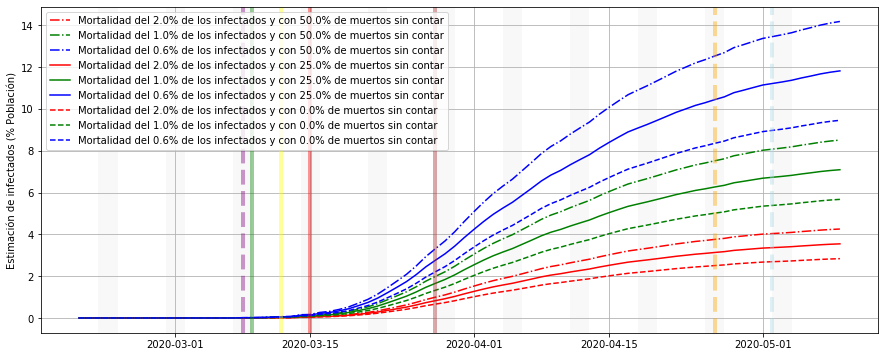

In [11]:
#poblacion = 46400000
porcenErrorMuertos = 25.#100*5000/23000#25. 

fig, ax = plt.subplots(figsize=(15,6))
for porcenErrorMuertos,l in zip([50.,25.,0.],['-.','-','--']):
    for i,c in zip([2,1,.6],['r','g','b']):
        ax.plot(kv.index,kv[['Fallecidos']].values*(100.+porcenErrorMuertos)*(100./i)/poblacion.Value.sum(),
                l,
                color=c,
                label=u'Mortalidad del {:.1f}% de los infectados y con {:.1f}% de muertos sin contar'.format(i,porcenErrorMuertos))
    #ax.plot(kv.index,kv[['Fallecidos']].values*(100)*(100./i)/poblacion.Value.sum(),'--',
    #        color=c,
    #        label=u'Mortalidad del {:.1f}% de los infectados y con {:.1f}% de muertos sin contar'.format(i,0))
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.03/poblacion.Value.sum()).plot(ax=ax)
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.01/poblacion.Value.sum()).plot(ax=ax)
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.006/poblacion.Value.sum()).plot(ax=ax)
ax.set_ylabel('Estimación de infectados (% Población)')
plt.grid()
plt.legend()
#ax.set_title('Mortalidad (+ Subestimación mortalidad de {:.2f}) = ')
highlight_datetimes(weekend_indices, ax)

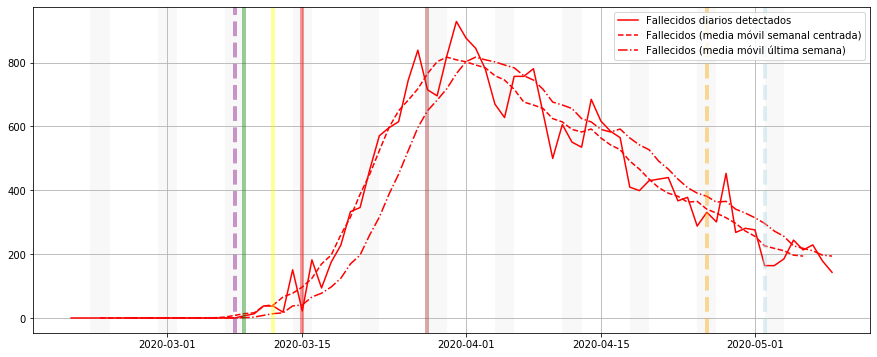

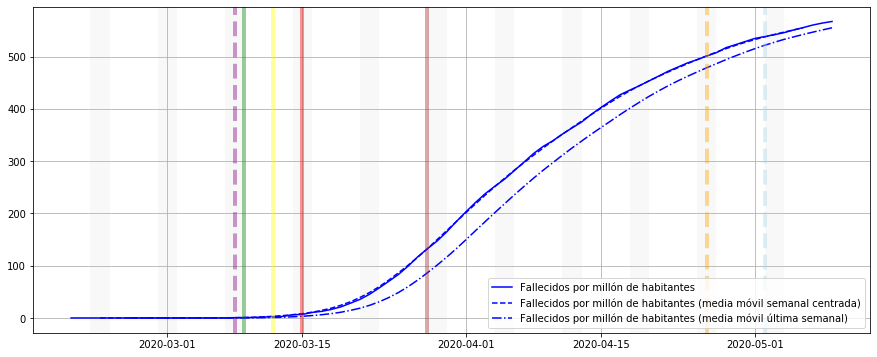

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(kv.index,kv[['DFallecidos']],color='r',label='Fallecidos diarios detectados')
ax.plot(kv.index,kv[['DFallecidos']].rolling(7,center=True).mean(),'--',color='r',
        label='Fallecidos (media móvil semanal centrada)')
ax.plot(kv.index,kv[['DFallecidos']].rolling(7,center=False).mean(),'-.',color='r',
        label='Fallecidos (media móvil última semana)')
plt.grid()
plt.legend()
highlight_datetimes(weekend_indices, ax)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(kv.index,kv[['Fallecidos']]/poblacion.Value.sum()*1000000,color='b',label='Fallecidos por millón de habitantes')
ax.plot(kv.index,kv[['Fallecidos']].rolling(7,center=True).mean()/poblacion.Value.sum()*1000000,'--',color='b',
        label='Fallecidos por millón de habitantes (media móvil semanal centrada)')
ax.plot(kv.index,kv[['Fallecidos']].rolling(7,center=False).mean()/poblacion.Value.sum()*1000000,'-.',color='b',
        label='Fallecidos por millón de habitantes (media móvil última semanal)')
plt.grid()
plt.legend()
highlight_datetimes(weekend_indices, ax)
plt.show()

8.0


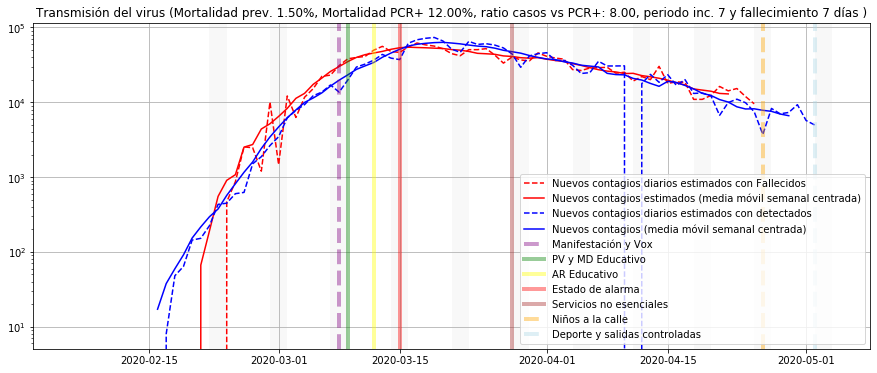

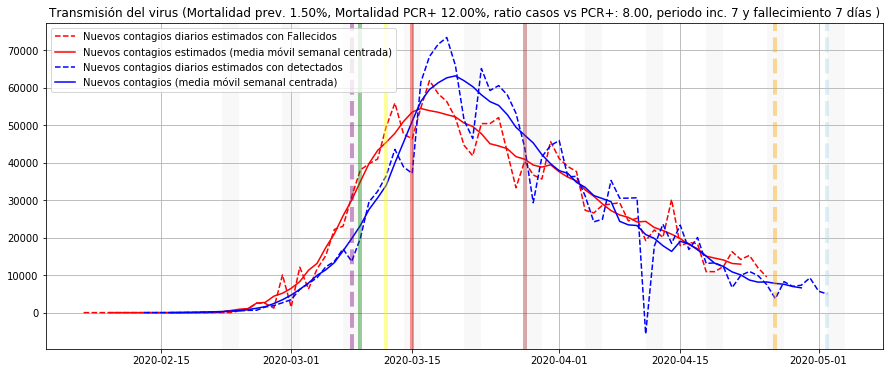

In [13]:
diasIncubacion = 7
diasRetraso = 7
mortalidadVsDetecciones = 12./100.
mortalidad = 1.5/100.
ratioCasosDetecciones = mortalidadVsDetecciones / mortalidad
print(ratioCasosDetecciones)
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Transmisión del virus (Mortalidad prev. {:.2f}%, Mortalidad PCR+ {:.2f}%, ratio casos vs PCR+: {:.2f}, periodo inc. {} y fallecimiento {} días )'.format(
    100*mortalidad,100*mortalidadVsDetecciones,ratioCasosDetecciones,diasIncubacion,diasRetraso
))
ax.plot(kv.index-pd.DateOffset(days=(diasRetraso+diasIncubacion)),kv[['DFallecidos']]/mortalidad,'--',color='r',label='Nuevos contagios diarios estimados con Fallecidos')
ax.plot(kv.index-pd.DateOffset(days=diasRetraso+diasIncubacion),kv[['DFallecidos']].rolling(7,center=True).mean()/mortalidad,'-',color='r',
        label='Nuevos contagios estimados (media móvil semanal centrada)')
#ax.plot(kv.index,kv[['DFallecidos']].rolling(7,center=False).mean().shift(-1*diasRetraso)/.12,'-.',color='r',
#        label='Fallecidos (media móvil última semana)')
ax.plot(kv.index-pd.DateOffset(days=diasIncubacion),kv[['DTotal']]*ratioCasosDetecciones,'--',color='b',label='Nuevos contagios diarios estimados con detectados')
ax.plot(kv.index-pd.DateOffset(days=diasIncubacion),kv[['DTotal']].rolling(7,center=True).mean()*ratioCasosDetecciones,'-',color='b',
        label='Nuevos contagios (media móvil semanal centrada)')
#ax.plot(kv.index,kv[['DTotal']].rolling(7,center=False).mean(),'-.',color='b',
#        label='Nuevos casos  (media móvil última semana)')

highlight_datetimes(weekend_indices, ax)


plt.grid()
plt.legend()

plt.yscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.title('Transmisión del virus (Mortalidad prev. {:.2f}%, Mortalidad PCR+ {:.2f}%, ratio casos vs PCR+: {:.2f}, periodo inc. {} y fallecimiento {} días )'.format(
    100*mortalidad,100*mortalidadVsDetecciones,ratioCasosDetecciones,diasIncubacion,diasRetraso
))
ax.plot(kv.index-pd.DateOffset(days=(diasRetraso+diasIncubacion)),kv[['DFallecidos']]/mortalidad,'--',color='r',label='Nuevos contagios diarios estimados con Fallecidos')
ax.plot(kv.index-pd.DateOffset(days=diasRetraso+diasIncubacion),kv[['DFallecidos']].rolling(7,center=True).mean()/mortalidad,'-',color='r',
        label='Nuevos contagios estimados (media móvil semanal centrada)')
#ax.plot(kv.index,kv[['DFallecidos']].rolling(7,center=False).mean().shift(-1*diasRetraso)/.12,'-.',color='r',
#        label='Fallecidos (media móvil última semana)')
ax.plot(kv.index-pd.DateOffset(days=diasIncubacion),kv[['DTotal']]*ratioCasosDetecciones,'--',color='b',label='Nuevos contagios diarios estimados con detectados')
ax.plot(kv.index-pd.DateOffset(days=diasIncubacion),kv[['DTotal']].rolling(7,center=True).mean()*ratioCasosDetecciones,'-',color='b',
        label='Nuevos contagios (media móvil semanal centrada)')
#ax.plot(kv.index,kv[['DTotal']].rolling(7,center=False).mean(),'-.',color='b',
#        label='Nuevos casos  (media móvil última semana)')



plt.grid()
plt.legend()
highlight_datetimes(weekend_indices, ax)


plt.show()

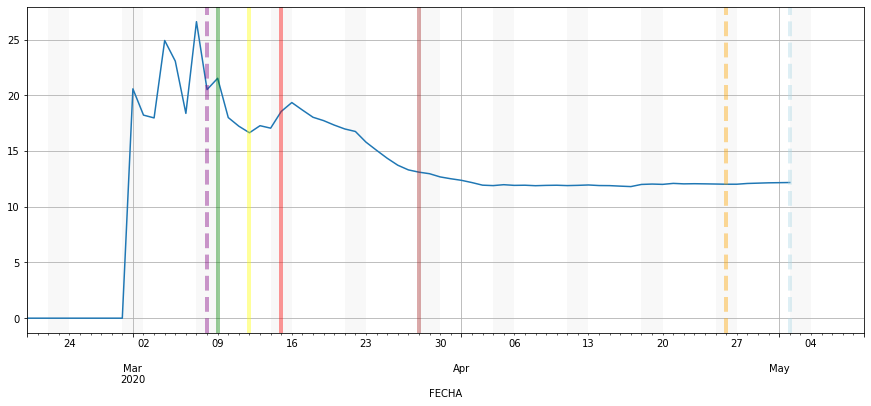

In [14]:

fig, ax = plt.subplots(figsize=(15,6))
(kv['Fallecidos'].shift(-7)/kv['Total']*100.).plot(ax=ax)
plt.grid()
highlight_datetimes(weekend_indices, ax)

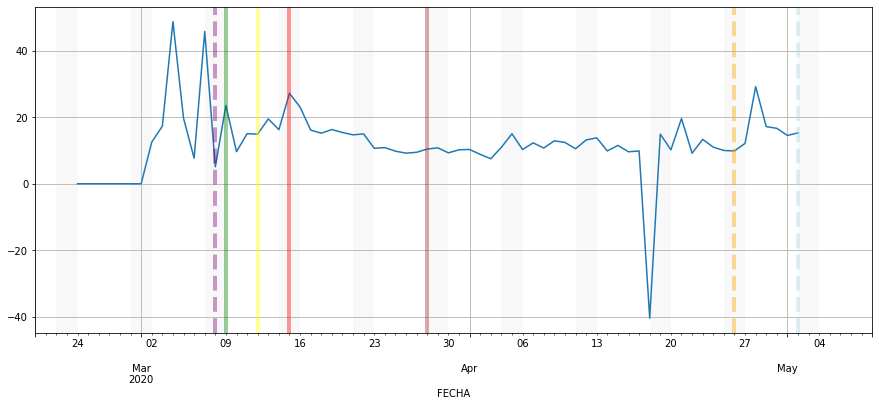

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
(kv['DFallecidos'].shift(-7)/(kv['DTotal'])*100.).plot(ax=ax)
plt.grid()
highlight_datetimes(weekend_indices, ax)

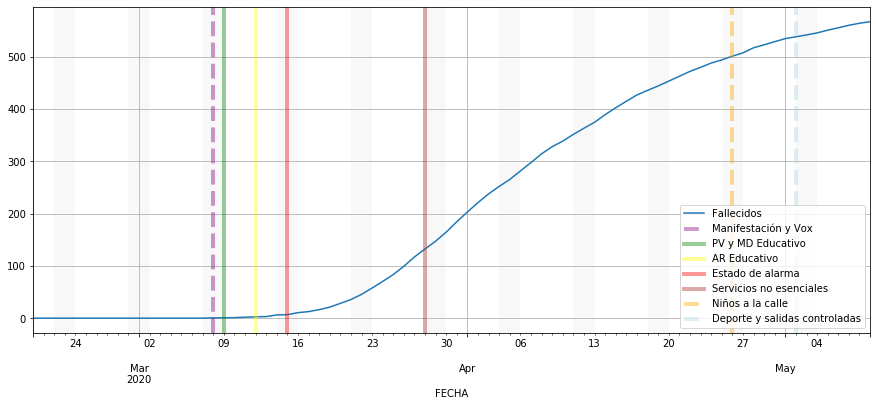

In [16]:

fig, ax = plt.subplots(figsize=(15,6))
(kv[['Fallecidos']]/poblacion.Value.sum()*1000000).plot(ax=ax,label=u'Fallecidos por millón de habitantes')
plt.grid()
highlight_datetimes(weekend_indices, ax)
plt.legend()

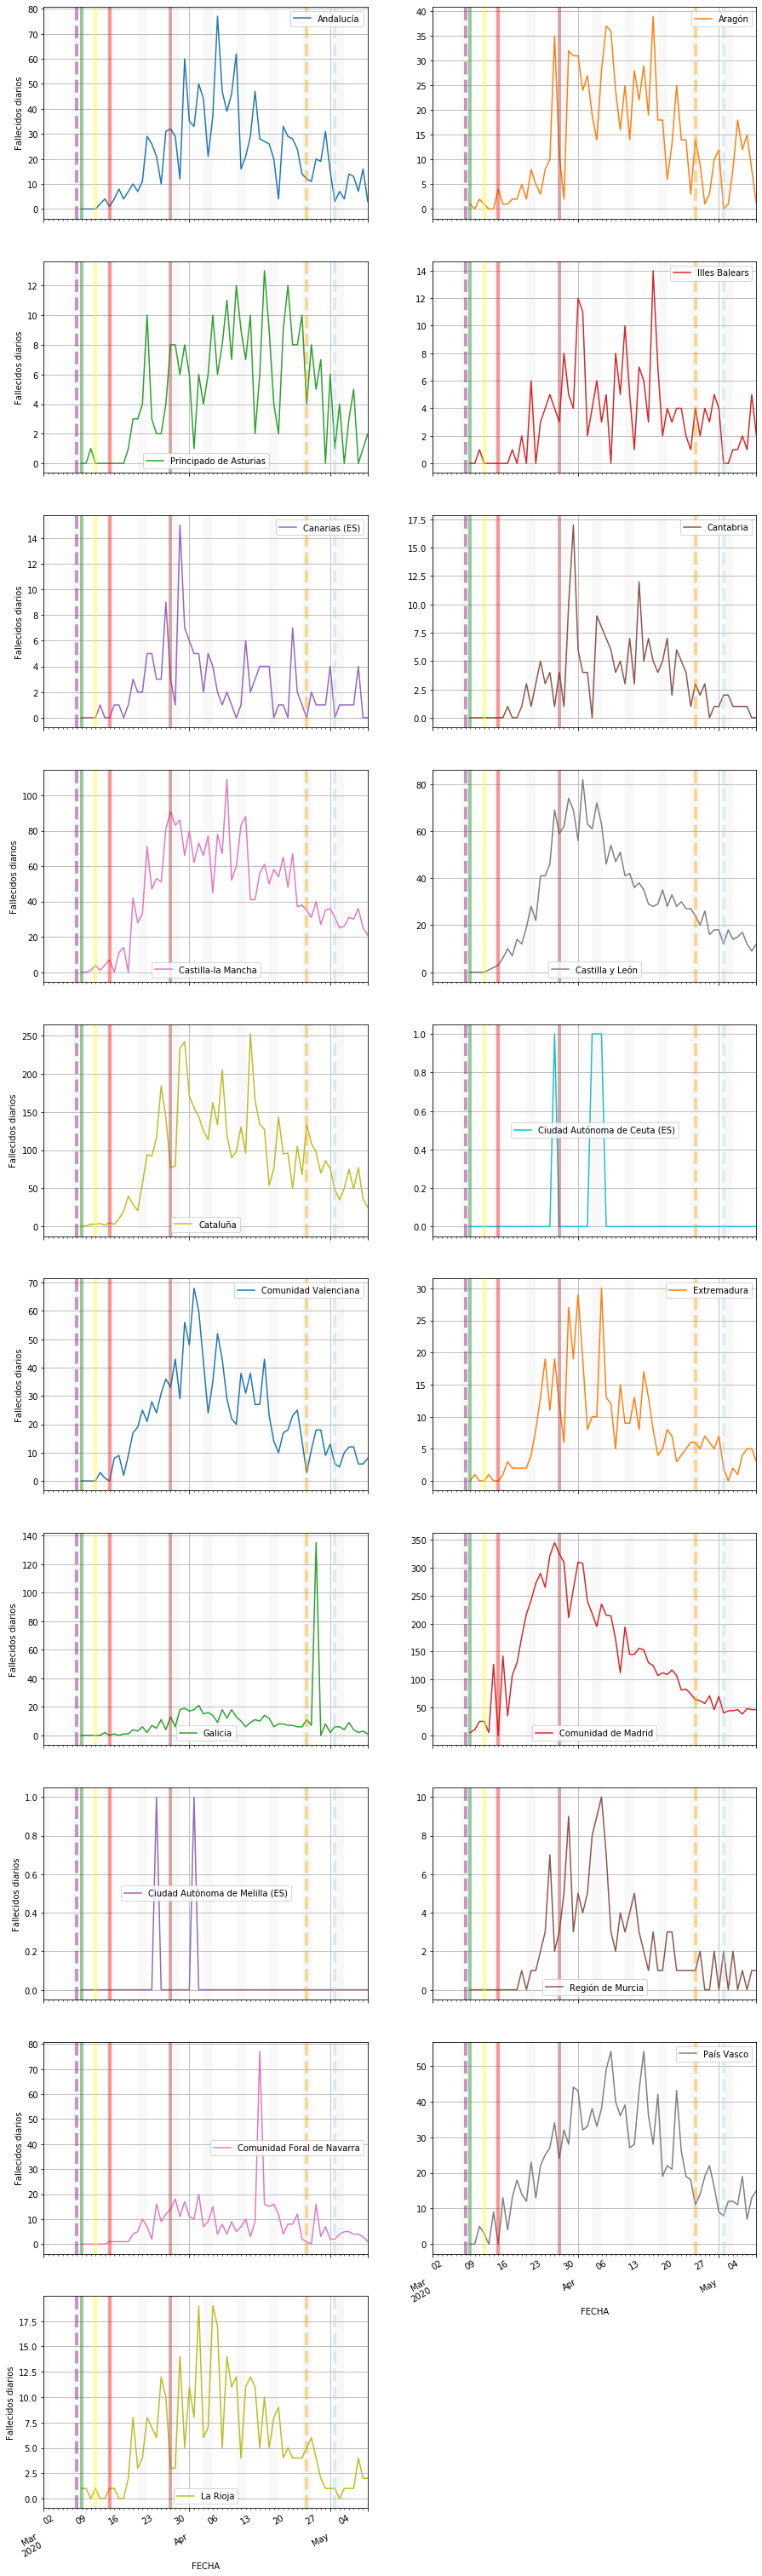

In [17]:


axes = datos.loc[idx['2020-03-01':,:]].DFallecidos.unstack(level=1).plot(subplots=True, 
                                                                grid=True,
                                                                figsize=(15, 60),
                                                                layout=(10, 2))
for kaxi in axes:
    try:
        #print(kaxi[0].legendlabels,poblacion.at[kaxi[0].legendlabels[0],'GEO'])
        highlight_datetimes(weekend_indices, kaxi[0])
        kaxi[0].legend( [poblacion.at[kaxi[0].legendlabels[0],'GEO']])
        kaxi[0].set(ylabel='Fallecidos diarios')
        #print(kaxi[1].legendlabels,poblacion.at[kaxi[1].legendlabels[0],'GEO'])
        highlight_datetimes(weekend_indices, kaxi[1])
        kaxi[1].legend( [poblacion.at[kaxi[1].legendlabels[0],'GEO']])
    except:
        continue

plt.show()

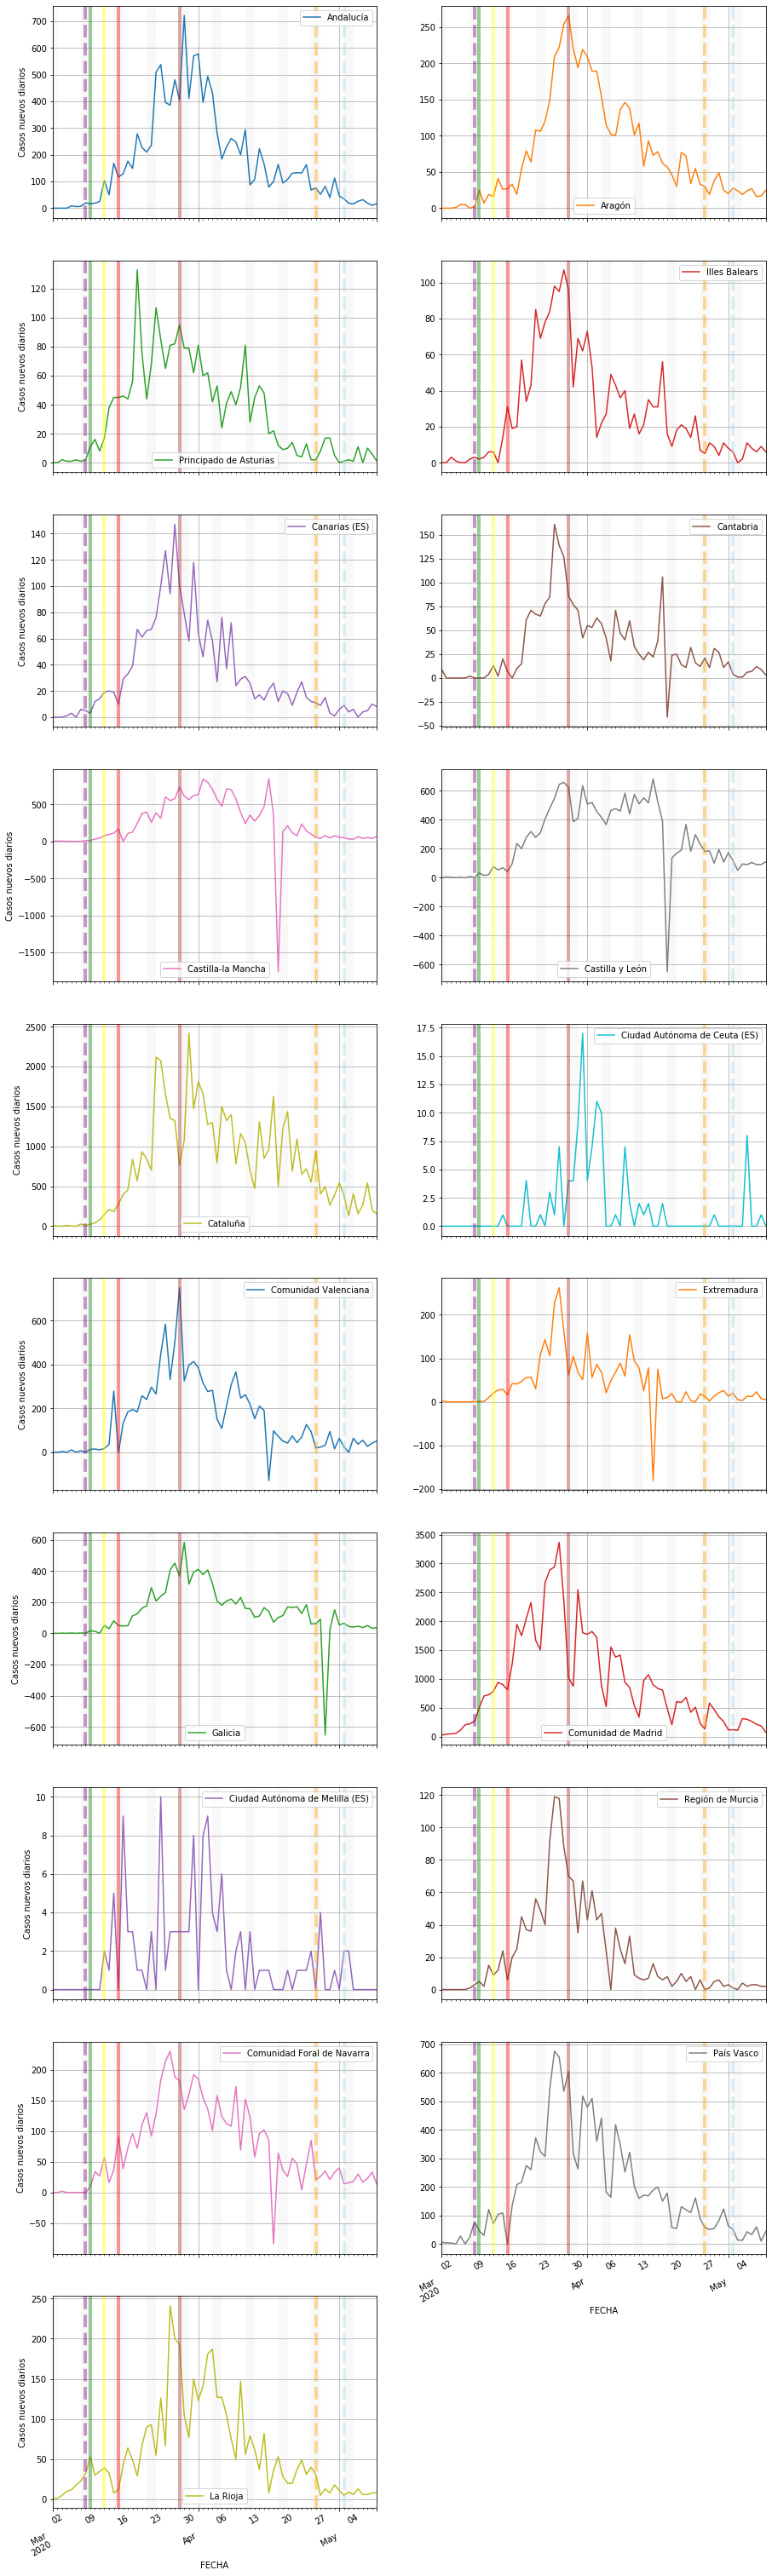

In [18]:
axes = datos.loc[idx['2020-03-01':,:]].DTotal.unstack(level=1).plot(subplots=True,
                                                                    grid=True, 
                                                                    figsize=(15, 60), 
                                                                    layout=(10, 2))
for kaxi in axes:
    try:
        #print(kaxi[0].legendlabels,poblacion.at[kaxi[0].legendlabels[0],'GEO'])
        kaxi[0].legend( [poblacion.at[kaxi[0].legendlabels[0],'GEO']])
        kaxi[0].set(ylabel='Casos nuevos diarios')
        highlight_datetimes(weekend_indices, kaxi[0])
        highlight_datetimes(weekend_indices, kaxi[1])
        #print(kaxi[1].legendlabels,poblacion.at[kaxi[1].legendlabels[0],'GEO'])
        kaxi[1].legend( [poblacion.at[kaxi[1].legendlabels[0],'GEO']])
    except:
        continue
#plt.title('Casos nuevos diarios')
plt.show()


In [19]:
datos.loc[idx['2020-04-27':,:],]

CASOS     PCR+  TestAc+  Hospitalizados    UCI  Fallecidos  \
FECHA      CCAA                                                               
2020-04-27 AN      NaN  11859.0   1359.0          5792.0  721.0      1168.0   
           AR      NaN   5004.0    553.0          2425.0  258.0       735.0   
           AS      NaN   2272.0    537.0          1843.0  137.0       261.0   
           IB      NaN   1870.0     70.0          1074.0  166.0       181.0   
           CN      NaN   2187.0      0.0           900.0  174.0       133.0   
...                ...      ...      ...             ...    ...         ...   
2020-05-09 ML      NaN    119.0     13.0            44.0    3.0         2.0   
           MC      NaN   1508.0    821.0           662.0  113.0       139.0   
           NC      NaN   5052.0   2403.0          2023.0  135.0       488.0   
           PV      NaN  13156.0   4521.0          6902.0  571.0      1418.0   
           RI      NaN   4008.0   1370.0          1474.0   91.0       346.0   

                 Recuperados    Total  DTotal  DFallecidos  DRecuperados  
FECHA      CCAA                                                           
2020-04-27 AN         5039.0  11859.0    52.0         11.0         149.0  
           AR         2081.0   5004.0    19.0          9.0          71.0  
           AS          780.0   2272.0     8.0          8.0          21.0  
           IB         1166.0   1870.0    11.0          2.0          30.0  
           CN         1075.0   2187.0     9.0          2.0          28.0  
...                      ...      ...     ...          ...           ...  
2020-05-09 ML          111.0    119.0     0.0          0.0           3.0  
           MC         1782.0   1508.0     2.0          1.0          15.0  
           NC         3014.0   5052.0    13.0          1.0          97.0  
           PV        14646.0  13156.0    45.0         15.0         661.0  
           RI         2648.0   4008.0     8.0          2.0          67.0  

[247 rows x 11 columns]

In [20]:
owid_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',
                        
            index_col=[1,2],
            parse_dates=[2],
            infer_datetime_format=True,)
owid_covid.columns

Index(['iso_code', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'tests_units', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

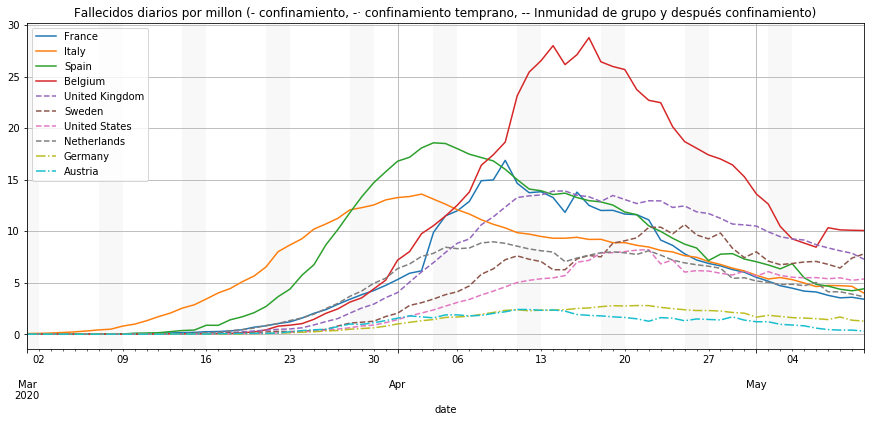

location    France  Italy   Spain  Belgium  United Kingdom  Sweden  \
date                                                                 
2020-04-21   8.380  7.509   9.197   12.511           8.234   3.961   
2020-04-22   8.135  8.832   9.304   14.668          17.264  18.318   
2020-04-23   8.334  7.228   9.411   22.779          12.329  17.031   
2020-04-24   7.905  7.674   7.849   19.673          10.709   8.317   
2020-04-25   5.960  6.947   8.085   16.308          14.804  12.971   
2020-04-26   5.653  6.864   6.160   20.536          12.418   3.961   
2020-04-27   3.707  4.300   0.000   15.272           6.187   0.198   
2020-04-28   6.695  5.508  13.517    9.750           4.979   7.921   
2020-04-29   5.622  6.318   9.689   10.699          13.390   8.020   
2020-04-30   6.542  5.342   5.732   14.668          11.711  10.595   
2020-05-01   4.428  4.714   6.010    8.024           9.928  12.278   
2020-05-02   3.340  4.449   5.903    9.405          10.886   6.634   
2020-05-03   2.543  7.840   3.508    5.350           9.148   1.584   
2020-05-04   2.068  2.878   3.508    6.816           4.640   0.990   
2020-05-05   4.688  3.225   3.957    6.903           4.242   8.912   
2020-05-06   5.056  3.903   5.219    7.938          10.208   8.416   
2020-05-07   4.259  6.103   4.556   27.870           9.560   8.614   
2020-05-08   2.727  4.532   3.871    6.558           7.940   9.803   
2020-05-09   3.723  4.019   4.855    9.146           9.221  13.367   
2020-05-10   1.226  3.209   4.855    5.177           5.097   4.456   

location    United States  Netherlands  Germany  Austria  
date                                                      
2020-04-21          5.610        3.910    2.315    1.110  
2020-04-22          7.625        9.629    3.354    0.111  
2020-04-23          5.199        8.054    2.566    3.442  
2020-04-24          9.604        7.178    2.709    1.554  
2020-04-25          3.184        6.536    2.136    0.555  
2020-04-26          6.562        7.003    1.671    2.554  
2020-04-27          5.097        3.852    1.313    0.666  
2020-04-28          4.136        2.510    1.945    0.777  
2020-04-29          6.375        2.801    2.411    2.221  
2020-04-30          7.888        8.462    2.065    1.221  
2020-05-01          6.163        4.902    0.000    0.444  
2020-05-02          6.230        5.719    3.425    0.555  
2020-05-03          3.979        5.486    0.883    0.777  
2020-05-04          3.918        4.027    0.513    0.222  
2020-05-05          3.782        1.517    1.659    0.222  
2020-05-06          6.477        5.019    1.969    0.666  
2020-05-07          7.109        2.101    1.468    0.222  
2020-05-08          6.764        4.902    1.755    0.111  
2020-05-09          4.562        4.144    1.229    0.555  
2020-05-10          4.876        3.677    0.310    0.111

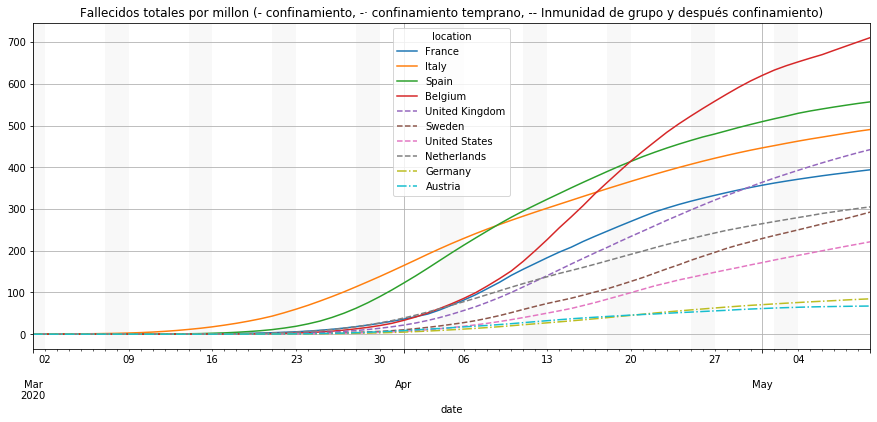

location     France    Italy    Spain  Belgium  United Kingdom   Sweden  \
date                                                                      
2020-04-21  310.463  398.830  455.183  502.864         280.632  156.447   
2020-04-22  318.598  407.662  464.487  517.532         297.896  174.765   
2020-04-23  326.932  414.890  473.898  540.311         310.226  191.796   
2020-04-24  334.837  422.564  481.748  559.984         320.935  200.113   
2020-04-25  340.797  429.511  489.832  576.292         335.739  213.085   
2020-04-26  346.450  436.375  495.992  596.827         348.157  217.045   
2020-04-27  350.157  440.675  495.992  612.100         354.344  217.243   
2020-04-28  356.852  446.182  509.509  621.850         359.323  225.165   
2020-04-29  362.475  452.500  519.198  632.549         372.713  233.185   
2020-04-30  369.016  457.843  524.930  647.217         384.424  243.780   
2020-05-01  373.444  462.556  530.940  655.242         394.352  256.058   
2020-05-02  376.784  467.005  536.843  664.647         405.238  262.692   
2020-05-03  379.327  474.845  540.351  669.996         414.386  264.277   
2020-05-04  381.395  477.723  543.859  676.813         419.026  265.267   
2020-05-05  386.083  480.948  547.816  683.715         423.268  274.178   
2020-05-06  391.139  484.851  553.034  691.654         433.477  282.595   
2020-05-07  395.398  490.954  557.590  719.523         443.037  291.209   
2020-05-08  398.125  495.486  561.461  726.081         450.977  301.012   
2020-05-09  401.848  499.505  566.316  735.227         460.198  314.379   
2020-05-10  403.073  502.714  566.316  740.404         465.295  318.835   

location    United States  Netherlands  Germany  Austria  
date                                                      
2020-04-21        128.516      218.910   54.879   51.297  
2020-04-22        136.141      228.540   58.233   51.408  
2020-04-23        141.340      236.594   60.799   54.850  
2020-04-24        150.944      243.772   63.509   56.404  
2020-04-25        154.129      250.308   65.645   56.959  
2020-04-26        160.691      257.312   67.316   59.513  
2020-04-27        165.787      261.163   68.629   60.179  
2020-04-28        169.923      263.673   70.574   60.957  
2020-04-29        176.298      266.474   72.985   63.177  
2020-04-30        184.186      274.936   75.050   64.399  
2020-05-01        190.349      279.839   75.050   64.843  
2020-05-02        196.578      285.558   78.476   65.398  
2020-05-03        200.557      291.044   79.359   66.175  
2020-05-04        204.476      295.071   79.872   66.397  
2020-05-05        208.258      296.588   81.531   66.619  
2020-05-06        214.735      301.607   83.500   67.285  
2020-05-07        221.844      303.708   84.969   67.508  
2020-05-08        228.608      308.610   86.723   67.619  
2020-05-09        233.170      312.754   87.952   68.174  
2020-05-10        238.046      316.431   88.263   68.285

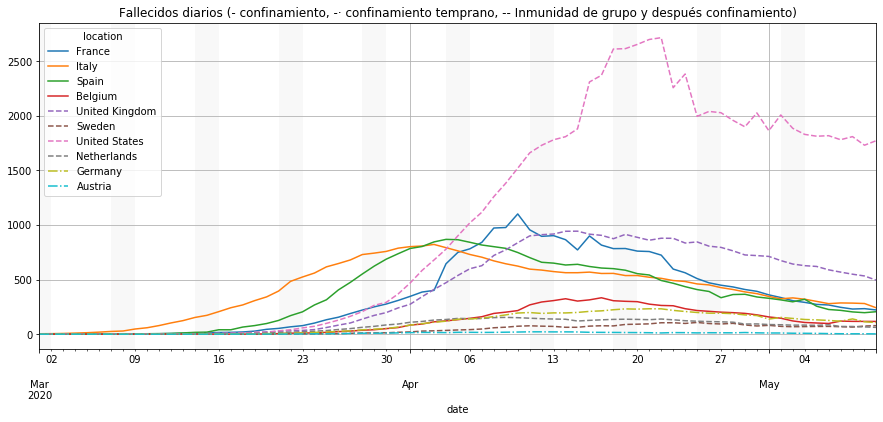

location    France  Italy  Spain  Belgium  United Kingdom  Sweden  \
date                                                                
2020-04-21   547.0  454.0  430.0    145.0           559.0    40.0   
2020-04-22   531.0  534.0  435.0    170.0          1172.0   185.0   
2020-04-23   544.0  437.0  440.0    264.0           837.0   172.0   
2020-04-24   516.0  464.0  367.0    228.0           727.0    84.0   
2020-04-25   389.0  420.0  378.0    189.0          1005.0   131.0   
2020-04-26   369.0  415.0  288.0    238.0           843.0    40.0   
2020-04-27   242.0  260.0    0.0    177.0           420.0     2.0   
2020-04-28   437.0  333.0  632.0    113.0           338.0    80.0   
2020-04-29   367.0  382.0  453.0    124.0           909.0    81.0   
2020-04-30   427.0  323.0  268.0    170.0           795.0   107.0   
2020-05-01   289.0  285.0  281.0     93.0           674.0   124.0   
2020-05-02   218.0  269.0  276.0    109.0           739.0    67.0   
2020-05-03   166.0  474.0  164.0     62.0           621.0    16.0   
2020-05-04   135.0  174.0  164.0     79.0           315.0    10.0   
2020-05-05   306.0  195.0  185.0     80.0           288.0    90.0   
2020-05-06   330.0  236.0  244.0     92.0           693.0    85.0   
2020-05-07   278.0  369.0  213.0    323.0           649.0    87.0   
2020-05-08   178.0  274.0  181.0     76.0           539.0    99.0   
2020-05-09   243.0  243.0  227.0    106.0           626.0   135.0   
2020-05-10    80.0  194.0  227.0     60.0           346.0    45.0   

location    United States  Netherlands  Germany  Austria  
date                                                      
2020-04-21         1857.0         67.0    194.0     10.0  
2020-04-22         2524.0        165.0    281.0      1.0  
2020-04-23         1721.0        138.0    215.0     31.0  
2020-04-24         3179.0        123.0    227.0     14.0  
2020-04-25         1054.0        112.0    179.0      5.0  
2020-04-26         2172.0        120.0    140.0     23.0  
2020-04-27         1687.0         66.0    110.0      6.0  
2020-04-28         1369.0         43.0    163.0      7.0  
2020-04-29         2110.0         48.0    202.0     20.0  
2020-04-30         2611.0        145.0    173.0     11.0  
2020-05-01         2040.0         84.0      0.0      4.0  
2020-05-02         2062.0         98.0    287.0      5.0  
2020-05-03         1317.0         94.0     74.0      7.0  
2020-05-04         1297.0         69.0     43.0      2.0  
2020-05-05         1252.0         26.0    139.0      2.0  
2020-05-06         2144.0         86.0    165.0      6.0  
2020-05-07         2353.0         36.0    123.0      2.0  
2020-05-08         2239.0         84.0    147.0      1.0  
2020-05-09         1510.0         71.0    103.0      5.0  
2020-05-10         1614.0         63.0     26.0      1.0

In [21]:
lpaises = ['France','Italy','Spain','Belgium',
           'United Kingdom','Sweden','United States','Netherlands',
           'Germany','Austria']
           #'New Zealand','Australia']
llines  = ['-','-','-','-',
           '--','--','--','--',
           '-.','-.']



fig, ax = plt.subplots(figsize=(15,6))
owid_covid.loc[idx[lpaises,:],
               'new_deaths_per_million'].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines)
#owid_covid.loc[idx[lpaises],
#               'new_deaths_per_million'].unstack(level=0).interpolate('index').rolling(1,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines,alpha=.2)


plt.grid()
plt.legend(loc='upper left')
plt.title('Fallecidos diarios por millon (- confinamiento, -· confinamiento temprano, -- Inmunidad de grupo y después confinamiento)')
highlight_datetimes(weekend_indices, ax,items=False)
plt.show()
#owid_covid.loc[lpaises,
#               ['new_deaths_per_million']].unstack(level=0).interpolate('index').rolling(1,center=False).mean().loc[idx['2020-03-01':]].plot(subplots=True,
#                                                                                               grid=True,
#                                                                                  figsize=(15, 60), 
#                                                                                  layout=(10, 2));

display(owid_covid.loc[idx[lpaises,:],
               'new_deaths_per_million'].unstack(level=0).interpolate('index').rolling(1,center=False).mean().loc[idx['2020-04-21':],lpaises])


fig, ax = plt.subplots(figsize=(15,6))
plt.title('Fallecidos totales por millon (- confinamiento, -· confinamiento temprano, -- Inmunidad de grupo y después confinamiento)')
owid_covid.loc[idx[lpaises,:],
               'total_deaths_per_million'].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines)
plt.grid()
highlight_datetimes(weekend_indices, ax,items=False)
plt.show()
#owid_covid.loc[lpaises,
#               ['total_deaths_per_million']].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':]].plot(subplots=True,
#                                                                                                 grid=True,
#                                                                                  figsize=(15, 60), 
#                                                                                  layout=(10, 2));

display(owid_covid.loc[idx[lpaises],
               'total_deaths_per_million'].unstack(level=0).interpolate('index').rolling(1,center=False).mean().loc[idx['2020-04-21':],lpaises])

fig, ax = plt.subplots(figsize=(15,6))
plt.title('Fallecidos diarios (- confinamiento, -· confinamiento temprano, -- Inmunidad de grupo y después confinamiento)')
owid_covid.loc[idx[lpaises],
               'new_deaths'].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines)
plt.grid()
highlight_datetimes(weekend_indices, ax,items=False)
plt.show()
#owid_covid.loc[lpaises,
#               ['new_deaths']].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':]].plot(subplots=True,
#                                                                                                 grid=True,
#                                                                                  figsize=(15, 60), 
#                                                                                  layout=(10, 2));

display(owid_covid.loc[idx[lpaises],
               'new_deaths'].unstack(level=0).interpolate('index').rolling(1,center=False).mean().loc[idx['2020-04-21':],lpaises])

In [22]:
owid_covid[owid_covid.iso_code == 'ESP'].unstack(level=0).rolling(7,center=True).apply(np.nanmean).loc[idx['2020-04-01':],'total_deaths_per_million']
owid_covid.loc[idx[lpaises],
               'new_deaths_per_million'].unstack(level=0).loc[idx['2020-04-01':]]
for i in owid_covid.index.levels[0]:
    print (i,owid_covid.loc[idx[i,:],'iso_code'].head(1).values[0])

Afghanistan AFG
Albania ALB
Algeria DZA
Andorra AND
Angola AGO
Anguilla AIA
Antigua and Barbuda ATG
Argentina ARG
Armenia ARM
Aruba ABW
Australia AUS
Austria AUT
Azerbaijan AZE
Bahamas BHS
Bahrain BHR
Bangladesh BGD
Barbados BRB
Belarus BLR
Belgium BEL
Belize BLZ
Benin BEN
Bermuda BMU
Bhutan BTN
Bolivia BOL
Bonaire Sint Eustatius and Saba BES
Bosnia and Herzegovina BIH
Botswana BWA
Brazil BRA
British Virgin Islands VGB
Brunei BRN
Bulgaria BGR
Burkina Faso BFA
Burundi BDI
Cambodia KHM
Cameroon CMR
Canada CAN
Cape Verde CPV
Cayman Islands CYM
Central African Republic CAF
Chad TCD
Chile CHL
China CHN
Colombia COL
Comoros COM
Congo COG
Costa Rica CRI
Cote d'Ivoire CIV
Croatia HRV
Cuba CUB
Curacao CUW
Cyprus CYP
Czech Republic CZE
Democratic Republic of Congo COD
Denmark DNK
Djibouti DJI
Dominica DMA
Dominican Republic DOM
Ecuador ECU
Egypt EGY
El Salvador SLV
Equatorial Guinea GNQ
Eritrea ERI
Estonia EST
Ethiopia ETH
Faeroe Islands FRO
Falkland Islands FLK
Fiji FJI
Finland FIN
France FRA
F

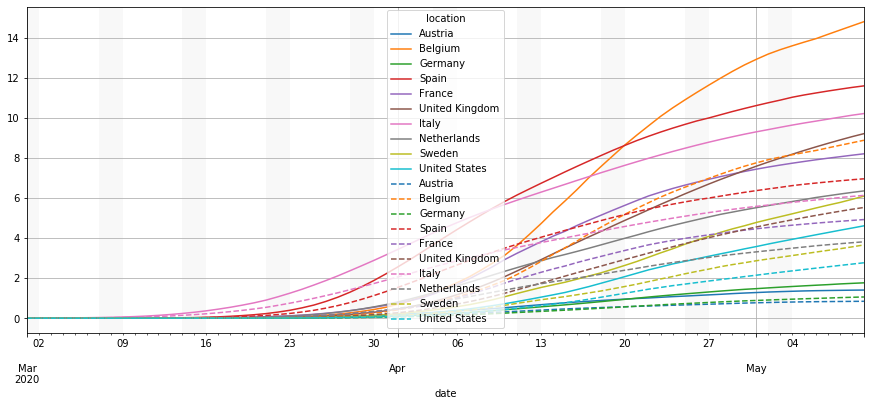

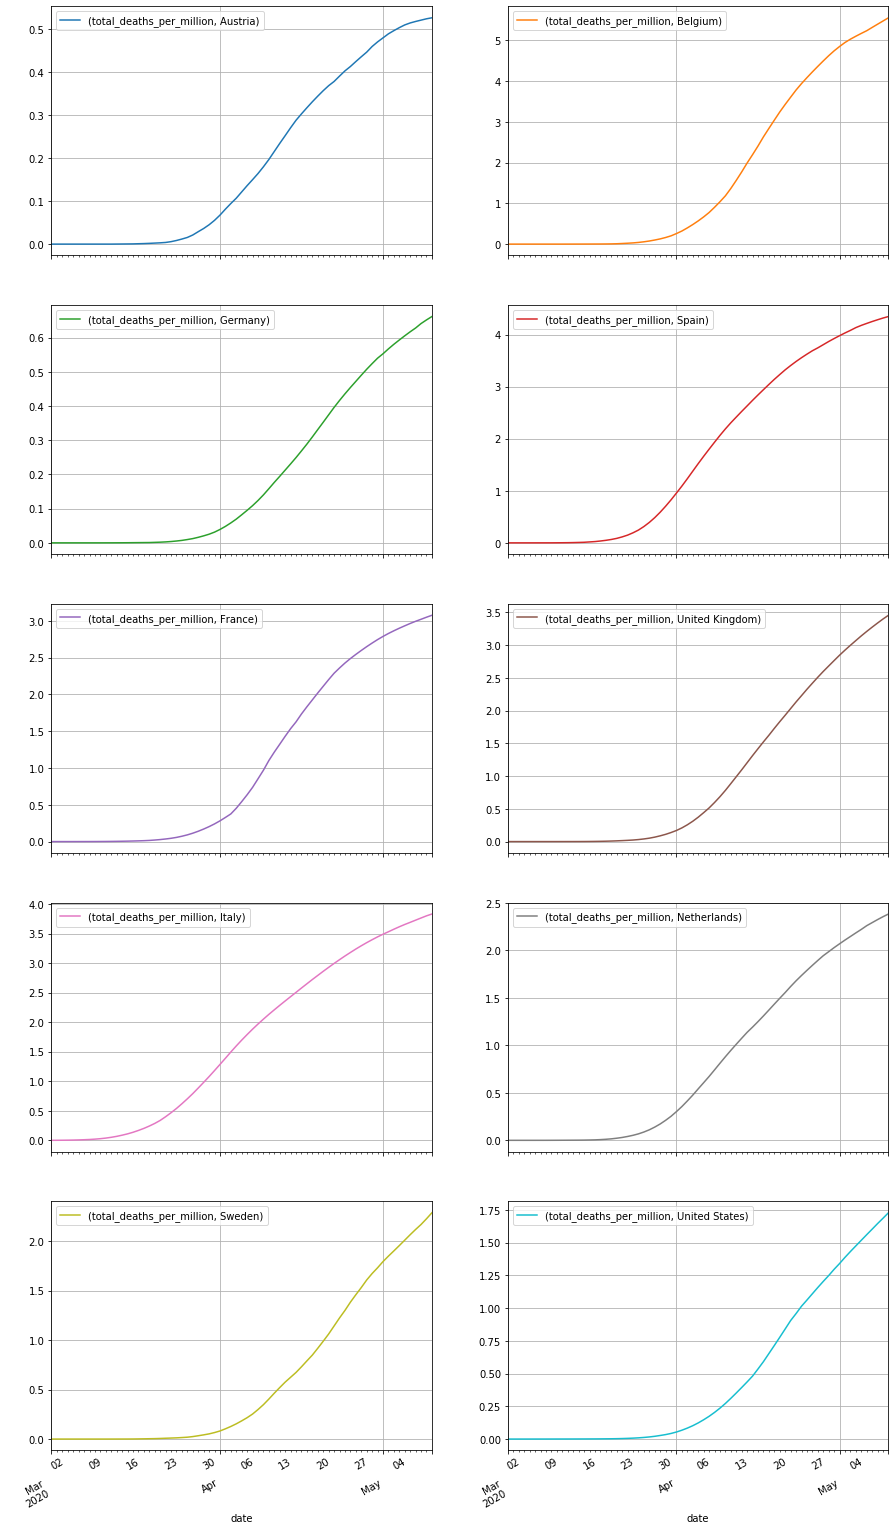

In [23]:
mortalidad = 1.6
porcenErrorMuertos = 25.#100*5000/23000#25. 



fig, ax = plt.subplots(figsize=(15,6))

(owid_covid.loc[lpaises,
               'total_deaths_per_million']*(100./.6)/1000000*(100+porcenErrorMuertos)).unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':]].plot(linestyle='-',ax=ax)
(owid_covid.loc[lpaises,
               'total_deaths_per_million']*(100./1.)/1000000*(100+porcenErrorMuertos)).unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':]].plot(linestyle='--',ax=ax)
plt.grid()

highlight_datetimes(weekend_indices, ax,items=False)
plt.show()
(owid_covid.loc[lpaises,
               ['total_deaths_per_million']]*(100./mortalidad)/1000000*(100+porcenErrorMuertos)).unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':]].plot(subplots=True,
                                                                                                                                 grid=True,
                                                                                  figsize=(15, 60), 
                                                                                  layout=(10, 2));




In [24]:
owid_spain = owid_covid.loc['Spain',:].loc['2020-03':]
owid_spain 

iso_code  total_cases  new_cases  total_deaths  new_deaths  \
date                                                                    
2020-03-01      ESP           66         32             0           0   
2020-03-02      ESP           83         17             0           0   
2020-03-03      ESP          114         31             0           0   
2020-03-04      ESP          151         37             0           0   
2020-03-05      ESP          200         49             1           1   
...             ...          ...        ...           ...         ...   
2020-05-05      ESP       219329       1318         25613         185   
2020-05-06      ESP       220325        996         25857         244   
2020-05-07      ESP       221447       1122         26070         213   
2020-05-08      ESP       222857       1410         26251         181   
2020-05-09      ESP       223578        721         26478         227   

            total_cases_per_million  new_cases_per_million  \
date                                                         
2020-03-01                    1.412                  0.684   
2020-03-02                    1.775                  0.364   
2020-03-03                    2.438                  0.663   
2020-03-04                    3.230                  0.791   
2020-03-05                    4.278                  1.048   
...                             ...                    ...   
2020-05-05                 4691.049                 28.190   
2020-05-06                 4712.352                 21.303   
2020-05-07                 4736.350                 23.998   
2020-05-08                 4766.507                 30.157   
2020-05-09                 4781.928                 15.421   

            total_deaths_per_million  new_deaths_per_million  total_tests  \
date                                                                        
2020-03-01                     0.000                   0.000          NaN   
2020-03-02                     0.000                   0.000          NaN   
2020-03-03                     0.000                   0.000          NaN   
2020-03-04                     0.000                   0.000          NaN   
2020-03-05                     0.021                   0.021          NaN   
...                              ...                     ...          ...   
2020-05-05                   547.816                   3.957          NaN   
2020-05-06                   553.034                   5.219          NaN   
2020-05-07                   557.590                   4.556    1625211.0   
2020-05-08                   561.461                   3.871          NaN   
2020-05-09                   566.316                   4.855          NaN   

            ...  aged_65_older  aged_70_older  gdp_per_capita extreme_poverty  \
date        ...                                                                 
2020-03-01  ...         19.436         13.799        34272.36             1.0   
2020-03-02  ...         19.436         13.799        34272.36             1.0   
2020-03-03  ...         19.436         13.799        34272.36             1.0   
2020-03-04  ...         19.436         13.799        34272.36             1.0   
2020-03-05  ...         19.436         13.799        34272.36             1.0   
...         ...            ...            ...             ...             ...   
2020-05-05  ...         19.436         13.799        34272.36             1.0   
2020-05-06  ...         19.436         13.799        34272.36             1.0   
2020-05-07  ...         19.436         13.799        34272.36             1.0   
2020-05-08  ...         19.436         13.799        34272.36             1.0   
2020-05-09  ...         19.436         13.799        34272.36             1.0   

            cvd_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
date                                                                            
2020-03-01          99.403          

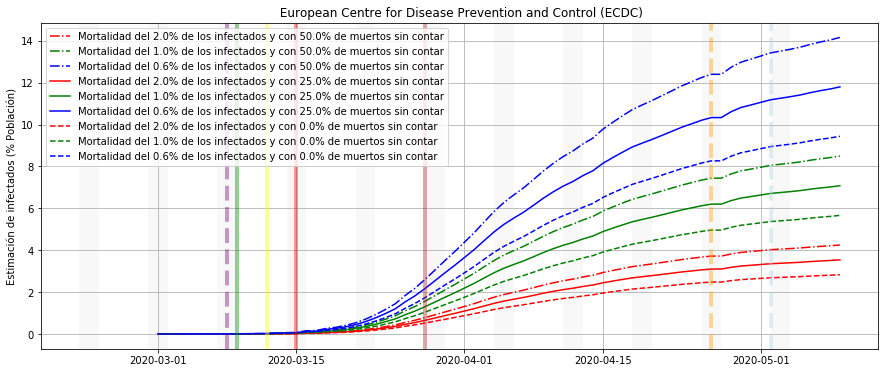

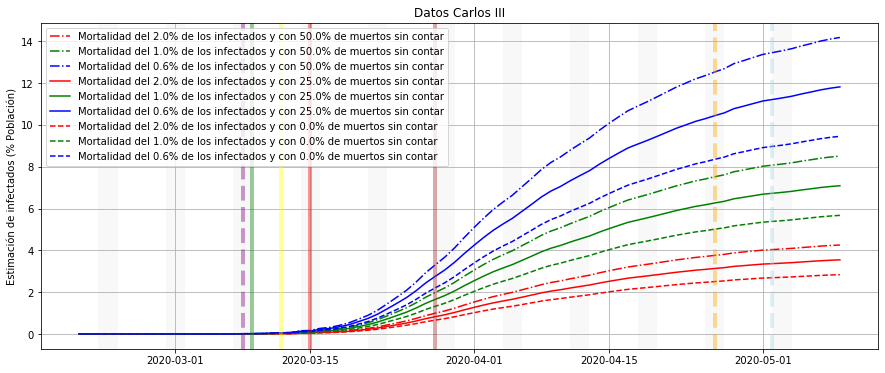

In [25]:

porcenErrorMuertos = 25.#100*5000/23000#25. 

fig, ax = plt.subplots(figsize=(15,6))
for porcenErrorMuertos,l in zip([50.,25.,0.],['-.','-','--']):
    for i,c in zip([2,1,.6],['r','g','b']):
        ax.plot(owid_spain.index,owid_spain.total_deaths_per_million*(100.+porcenErrorMuertos)*(100./i)/1000000.,
                l,
                color=c,
                label=u'Mortalidad del {:.1f}% de los infectados y con {:.1f}% de muertos sin contar'.format(i,porcenErrorMuertos))
    #ax.plot(kv.index,kv[['Fallecidos']].values*(100)*(100./i)/poblacion.Value.sum(),'--',
    #        color=c,
    #        label=u'Mortalidad del {:.1f}% de los infectados y con {:.1f}% de muertos sin contar'.format(i,0))
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.03/poblacion.Value.sum()).plot(ax=ax)
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.01/poblacion.Value.sum()).plot(ax=ax)
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.006/poblacion.Value.sum()).plot(ax=ax)
ax.set_ylabel('Estimación de infectados (% Población)')
plt.grid()
plt.legend()
plt.title(' European Centre for Disease Prevention and Control (ECDC)')
#ax.set_title('Mortalidad (+ Subestimación mortalidad de {:.2f}) = ')
highlight_datetimes(weekend_indices, ax)
plt.show()
#ax.set_title(' European Centre for Disease Prevention and Control (ECDC)')
#poblacion = 46400000
porcenErrorMuertos = 25.#100*5000/23000#25. 

fig, ax = plt.subplots(figsize=(15,6))
for porcenErrorMuertos,l in zip([50.,25.,0.],['-.','-','--']):
    for i,c in zip([2,1,.6],['r','g','b']):
        ax.plot(kv.index,kv[['Fallecidos']].values*(100.+porcenErrorMuertos)*(100./i)/poblacion.Value.sum(),
                l,
                color=c,
                label=u'Mortalidad del {:.1f}% de los infectados y con {:.1f}% de muertos sin contar'.format(i,porcenErrorMuertos))
    #ax.plot(kv.index,kv[['Fallecidos']].values*(100)*(100./i)/poblacion.Value.sum(),'--',
    #        color=c,
    #        label=u'Mortalidad del {:.1f}% de los infectados y con {:.1f}% de muertos sin contar'.format(i,0))
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.03/poblacion.Value.sum()).plot(ax=ax)
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.01/poblacion.Value.sum()).plot(ax=ax)
#(kv[['Fallecidos']]*(100.+porcenErrorMuertos)/.006/poblacion.Value.sum()).plot(ax=ax)
ax.set_ylabel('Estimación de infectados (% Población)')
plt.grid()
plt.legend()
plt.title('Datos Carlos III')
#ax.set_title('Mortalidad (+ Subestimación mortalidad de {:.2f}) = ')
highlight_datetimes(weekend_indices, ax)
plt.show()

In [26]:
#poblacion = pd.read_csv('demo_r_d2jan_1_Data.csv',sep=';',index_col=['Flag and Footnotes'])
display(poblacion.tail())
poblacion.Value.sum()

TIME                              GEO    SEX    AGE  \
Flag and Footnotes                                                        
AN                  2019                        Andalucía  Total  Total   
MC                  2019                 Región de Murcia  Total  Total   
CE                  2019    Ciudad Autónoma de Ceuta (ES)  Total  Total   
ML                  2019  Ciudad Autónoma de Melilla (ES)  Total  Total   
CN                  2019                    Canarias (ES)  Total  Total   

                      UNIT    Value  
Flag and Footnotes                   
AN                  Number  8427405  
MC                  Number  1487663  
CE                  Number    84829  
ML                  Number    84689  
CN                  Number  2206901

46937060

In [27]:
fallecidos = datos.loc[idx['2020-03-01':]].Fallecidos.unstack(level=1)
fallecidos.tail()

CCAA            AN     AR     AS     IB     CN     CB      CM      CL      CT  \
FECHA                                                                           
2020-05-05  1281.0  788.0  287.0  199.0  143.0  199.0  2647.0  1847.0  5345.0   
2020-05-06  1294.0  800.0  292.0  201.0  144.0  200.0  2677.0  1864.0  5394.0   
2020-05-07  1301.0  815.0  292.0  202.0  148.0  201.0  2713.0  1876.0  5471.0   
2020-05-08  1317.0  823.0  293.0  207.0  148.0  201.0  2738.0  1885.0  5507.0   
2020-05-09  1320.0  824.0  295.0  209.0  148.0  201.0  2759.0  1897.0  5532.0   

CCAA         CE      VC     EX     GA      MD   ML     MC     NC      PV  \
FECHA                                                                      
2020-05-05  4.0  1291.0  463.0  582.0  8466.0  2.0  136.0  476.0  1364.0   
2020-05-06  4.0  1303.0  467.0  586.0  8504.0  2.0  137.0  480.0  1383.0   
2020-05-07  4.0  1309.0  472.0  588.0  8552.0  2.0  137.0  484.0  1390.0   
2020-05-08  4.0  1315.0  477.0  591.0  8598.0  2.0  138.0  487.0  1403.0   
2020-05-09  4.0  1323.0  480.0  592.0  8644.0  2.0  139.0  488.0  1418.0   

CCAA           RI  
FECHA              
2020-05-05  337.0  
2020-05-06  338.0  
2020-05-07  342.0  
2020-05-08  344.0  
2020-05-09  346.0

In [28]:
poblacion.loc[fallecidos.columns,['Value']].T

CCAA        AN       AR       AS       IB       CN      CB       CM       CL  \
Value  8427405  1320586  1022205  1188220  2206901  581641  2034877  2407733   

CCAA        CT     CE       VC       EX       GA       MD     ML       MC  \
Value  7566431  84829  4974969  1065424  2700441  6641649  84689  1487663   

CCAA       NC       PV      RI  
Value  649946  2177880  313571

In [29]:
(100*fallecidos.divide(poblacion.loc[fallecidos.columns,'Value'].to_dict(),axis=1)).tail(1)

CCAA              AN        AR        AS        IB        CN        CB  \
FECHA                                                                    
2020-05-09  0.015663  0.062397  0.028859  0.017589  0.006706  0.034557   

CCAA              CM        CL        CT        CE        VC        EX  \
FECHA                                                                    
2020-05-09  0.135586  0.078788  0.073112  0.004715  0.026593  0.045052   

CCAA              GA        MD        ML        MC        NC        PV  \
FECHA                                                                    
2020-05-09  0.021922  0.130148  0.002362  0.009344  0.075083  0.065109   

CCAA              RI  
FECHA                 
2020-05-09  0.110342

In [30]:
100*8222.0/6641649

0.12379455764675308

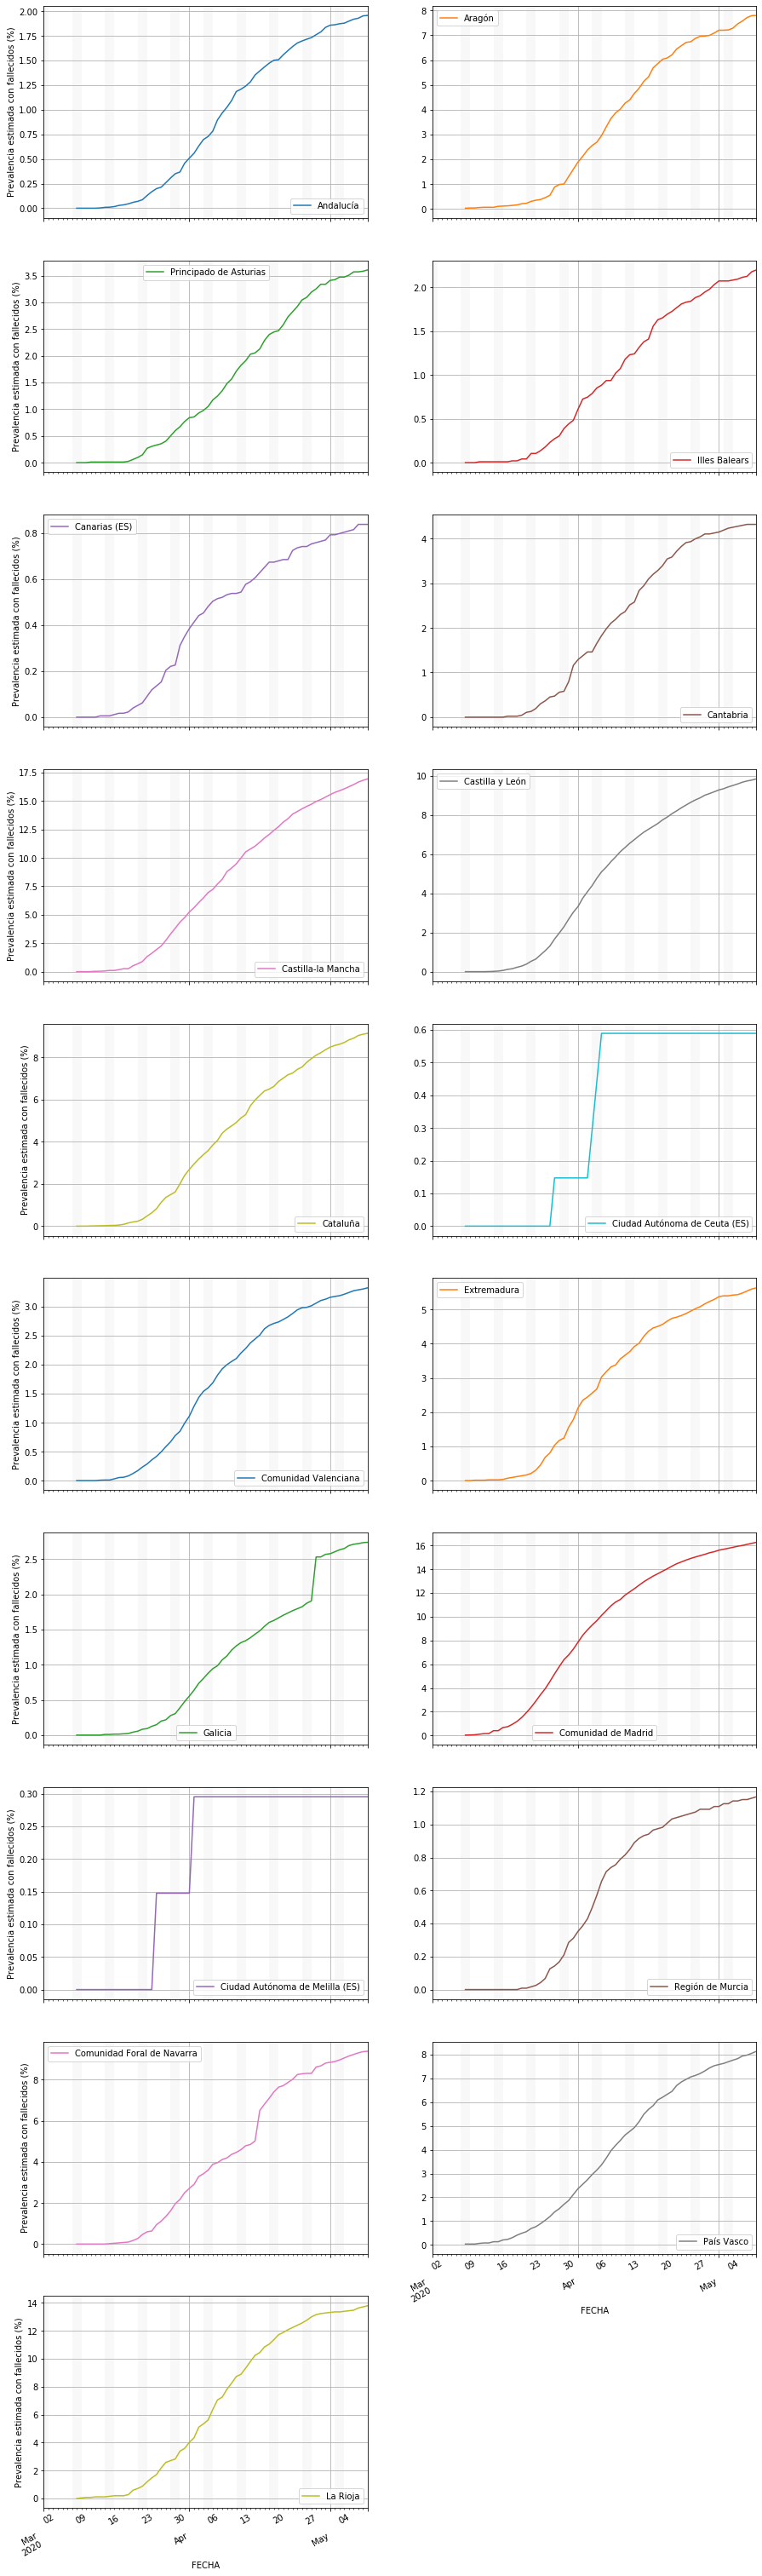

In [31]:
porcenErrorMuertos=25
mortalidad = 1.
axes = ((100.+porcenErrorMuertos)*(100./mortalidad)*fallecidos.divide(poblacion.loc[fallecidos.columns,'Value'].to_dict(),axis=1)).plot(subplots=True, 
           grid=True,
           figsize=(15, 60),
           #legend=poblacion.loc[fallecidos.columns,'GEO'].values,                                                                                                    
           layout=(10, 2))
for kaxi in axes:
    try:
        #print(kaxi[0].legendlabels,poblacion.at[kaxi[0].legendlabels[0],'GEO'])
        kaxi[0].legend( [poblacion.at[kaxi[0].legendlabels[0],'GEO']])
        kaxi[0].set(ylabel='Prevalencia estimada con fallecidos (%)')
        highlight_datetimes(weekend_indices, kaxi[0],items=False)
        highlight_datetimes(weekend_indices, kaxi[1],items=False)
        #print(kaxi[1].legendlabels,poblacion.at[kaxi[1].legendlabels[0],'GEO'])
        kaxi[1].legend( [poblacion.at[kaxi[1].legendlabels[0],'GEO']])
    except:
        continue
        
plt.show()

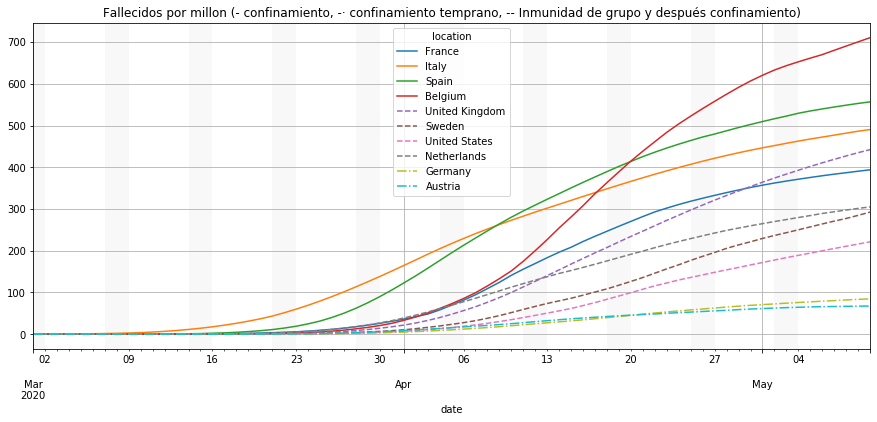

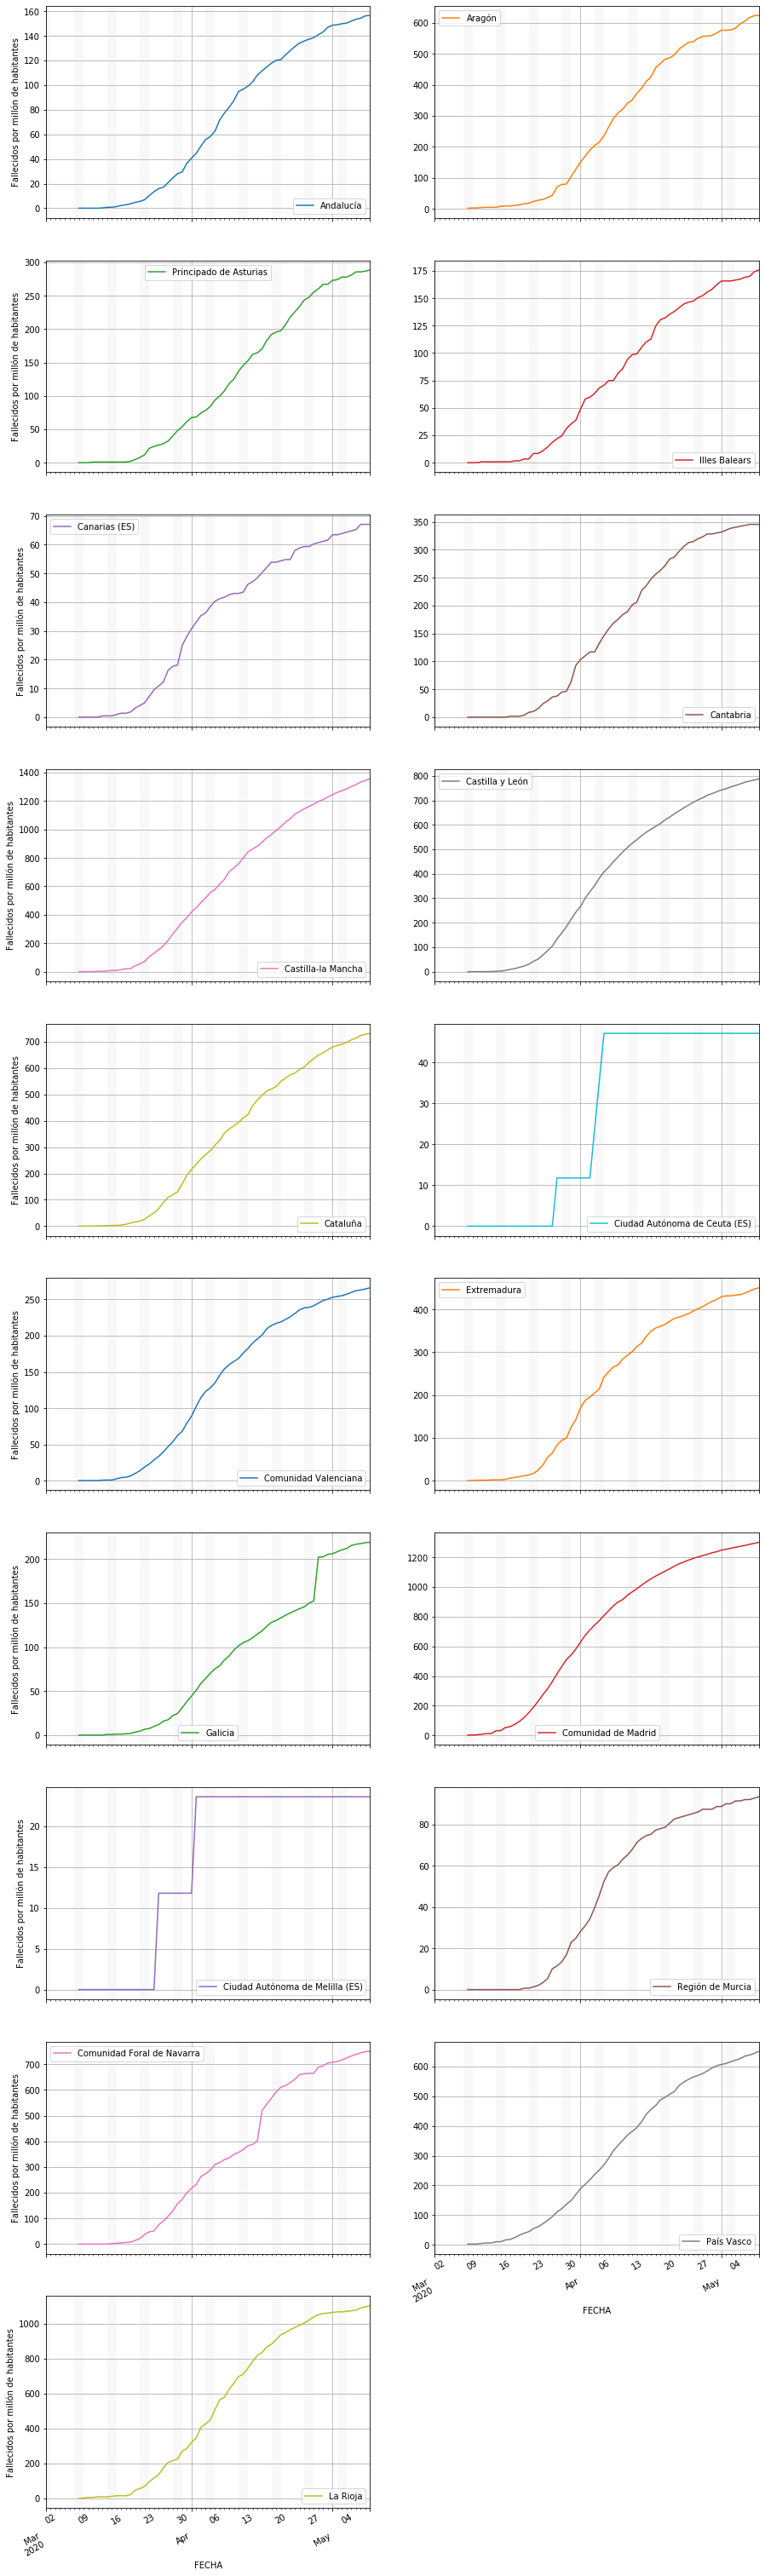

In [32]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Fallecidos por millon (- confinamiento, -· confinamiento temprano, -- Inmunidad de grupo y después confinamiento)')
owid_covid.loc[idx[lpaises,:],
               'total_deaths_per_million'].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines)
plt.grid()
highlight_datetimes(weekend_indices, ax,items=False)
plt.show()

axes = (1000000*fallecidos.divide(poblacion.loc[fallecidos.columns,'Value'].to_dict(),axis=1)).plot(subplots=True, 
           grid=True,
           figsize=(15, 60),
           layout=(10, 2))
for kaxi in axes:
    try:
        #print(kaxi[0].legendlabels,poblacion.at[kaxi[0].legendlabels[0],'GEO'])
        highlight_datetimes(weekend_indices, kaxi[0],items=False)
        kaxi[0].legend( [poblacion.at[kaxi[0].legendlabels[0],'GEO']])
        kaxi[0].set(ylabel='Fallecidos por millón de habitantes')
        highlight_datetimes(weekend_indices, kaxi[1],items=False)
        #print(kaxi[1].legendlabels,poblacion.at[kaxi[1].legendlabels[0],'GEO'])
        kaxi[1].legend( [poblacion.at[kaxi[1].legendlabels[0],'GEO']])
    except:
        continue

plt.show()

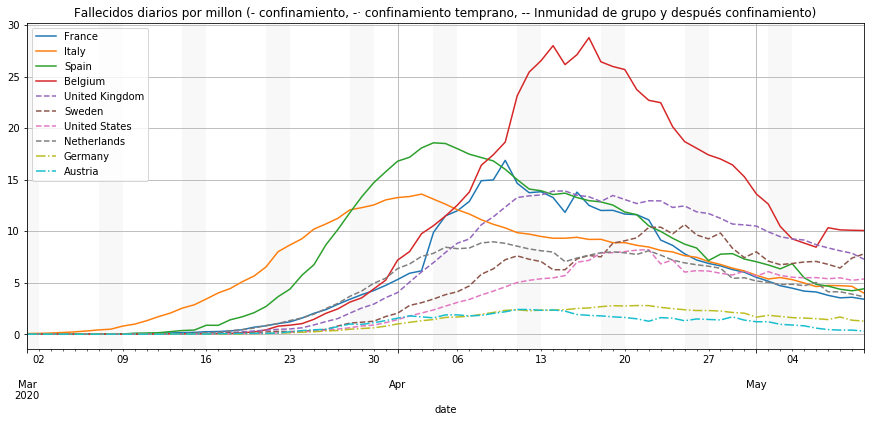

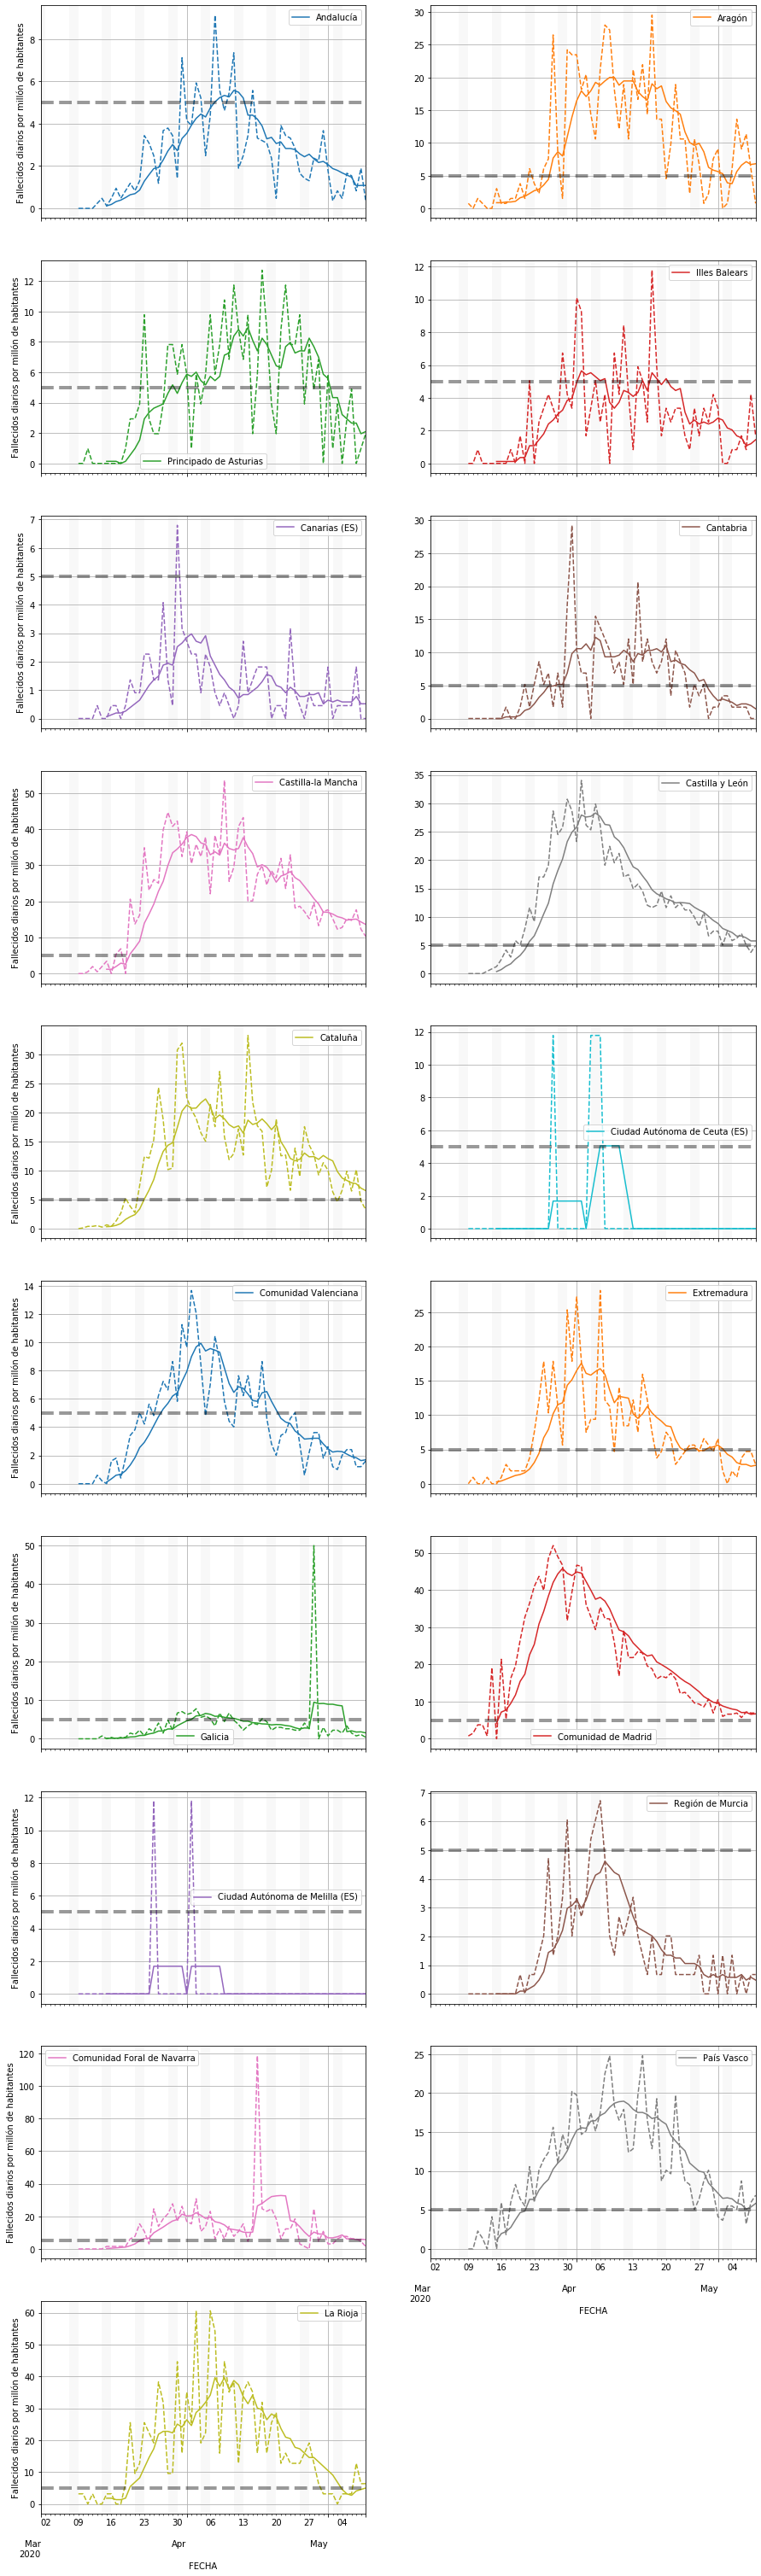

In [46]:


fig, ax = plt.subplots(figsize=(15,6))
owid_covid.loc[idx[lpaises,:],
               'new_deaths_per_million'].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines)
#owid_covid.loc[idx[lpaises],
#               'new_deaths_per_million'].unstack(level=0).interpolate('index').rolling(1,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines,alpha=.2)


plt.grid()
plt.legend(loc='upper left')
plt.title('Fallecidos diarios por millon (- confinamiento, -· confinamiento temprano, -- Inmunidad de grupo y después confinamiento)')
highlight_datetimes(weekend_indices, ax,items=False)
plt.show()


ktabla = (1000000*datos.loc[idx['2020-03-01':,:]].DFallecidos.unstack(level=1).interpolate('index').divide(poblacion.loc[fallecidos.columns,'Value'].to_dict(),axis=1)) 
axes = (1000000*datos.loc[idx['2020-03-01':,:]].DFallecidos.unstack(level=1).interpolate('index').rolling(7,center=False).mean().divide(poblacion.loc[fallecidos.columns,'Value'].to_dict(),axis=1)).plot(subplots=True, 
           grid=True,
           figsize=(15, 60),
           layout=(10, 2))
indices = datos.loc[idx['2020-03-01':,:]].DFallecidos.unstack(level=1).index
for kaxi in axes:
    try:
        #print(kaxi[0].legendlabels,poblacion.at[kaxi[0].legendlabels[0],'GEO'])
        
        #kaxi[0].plot(ktabla.index,ktabla[kaxi[0].legendlabels[0]],linestyle='--')#,label='No promediado'
        
        highlight_datetimes(weekend_indices, kaxi[0],items=False)
        kaxi[0].legend( [poblacion.at[kaxi[0].legendlabels[0],'GEO']])
        kaxi[0].set(ylabel='Fallecidos diarios por millón de habitantes')
        ktabla[kaxi[0].legendlabels[0]].plot(ax=kaxi[0],ls='--',c=kaxi[0].get_lines()[-1].get_color())
        kaxi[0].axhline(y=5,ls='--',linewidth=4, color='k',alpha=.4)#,label='Manifestación y Vox')
        
        kaxi[0].grid()


        highlight_datetimes(weekend_indices, kaxi[1],items=False)
        kaxi[1].legend( [poblacion.at[kaxi[1].legendlabels[0],'GEO']])
        ktabla[kaxi[1].legendlabels[0]].plot(ax=kaxi[1],ls='--',c=kaxi[1].get_lines()[-1].get_color())
        kaxi[1].axhline(y=5,ls='--',linewidth=4, color='k',alpha=.4)#,label='Manifestación y Vox')
        kaxi[1].grid()


    except:
        continue
#kcolor = kaxi[0].get_lines()[-1].get_color()
#ktabla[kaxi[0].legendlabels[0]].plot(ax=kaxi[0],ls='--',c=kcolor)

plt.show()

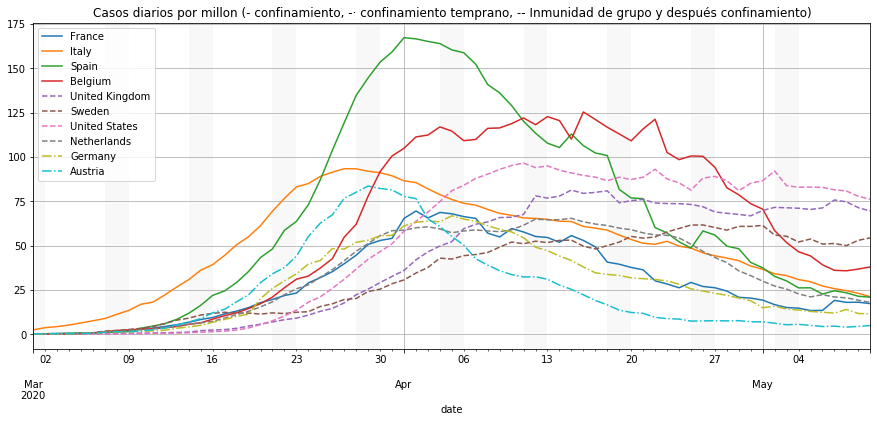

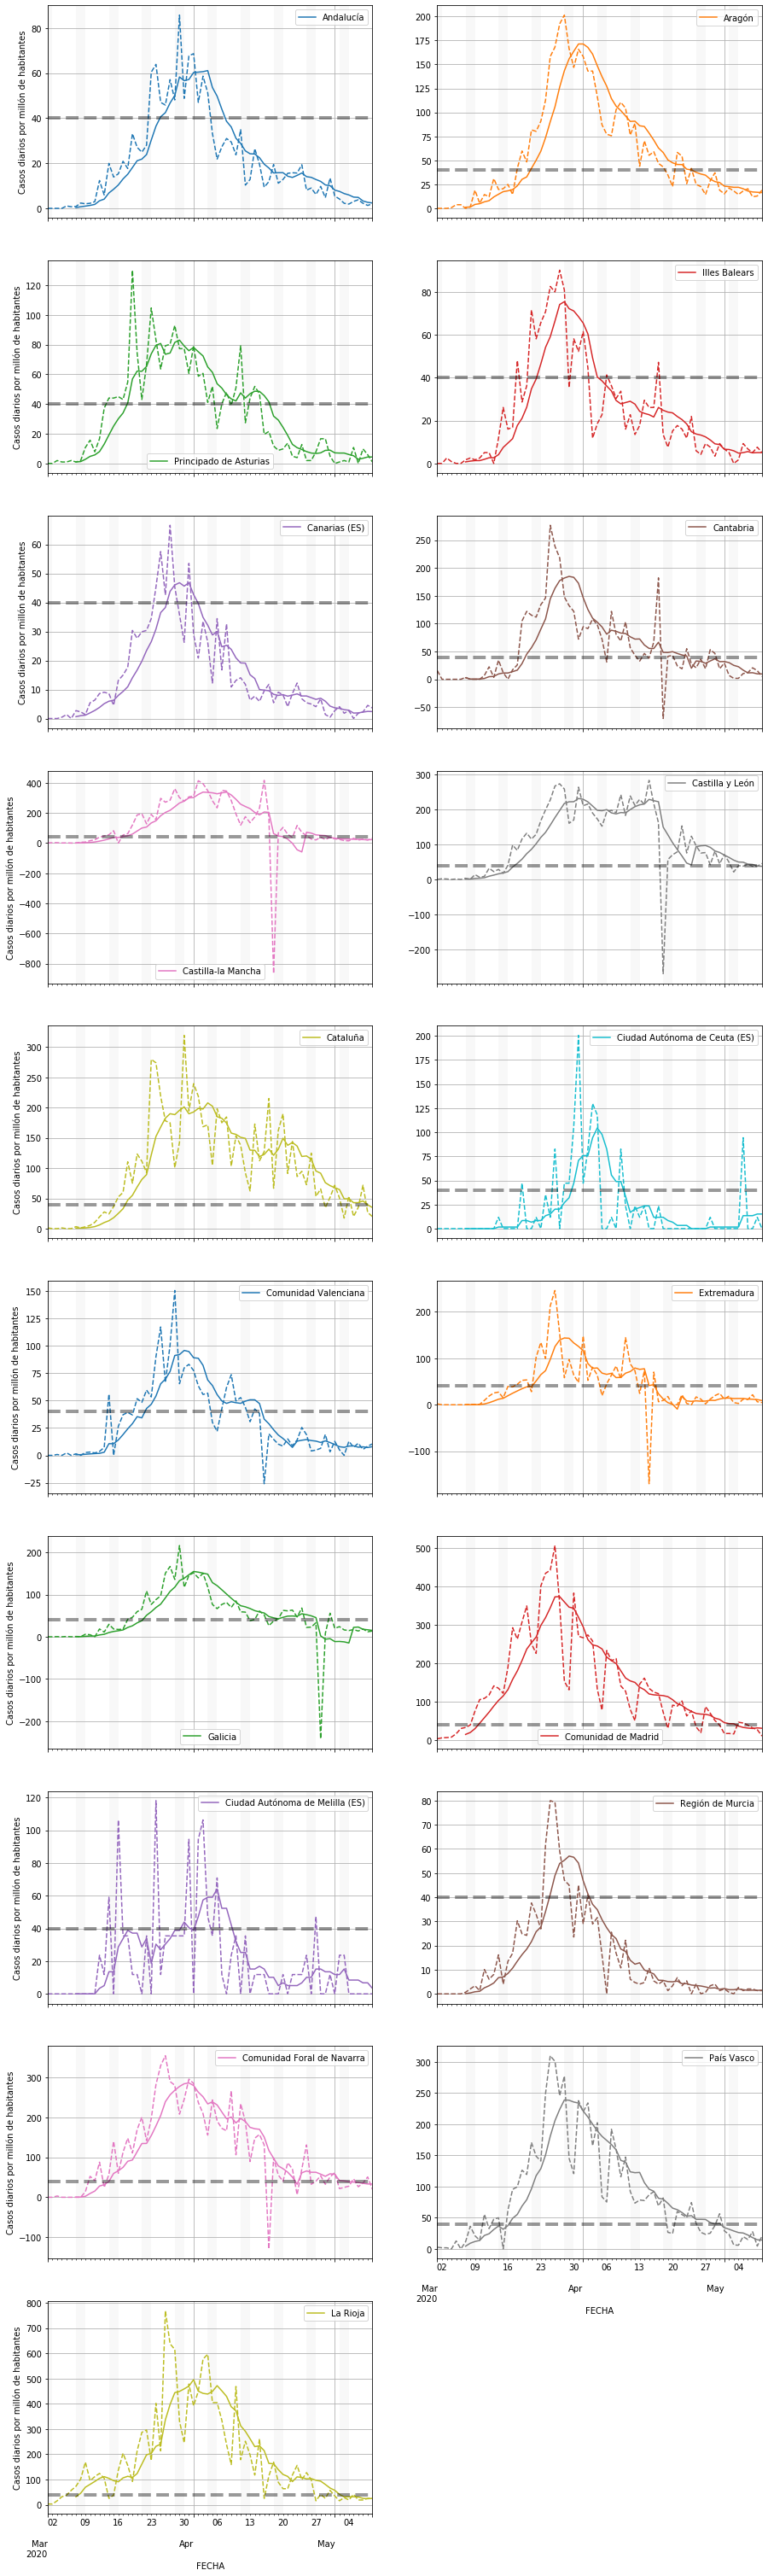

In [47]:

fig, ax = plt.subplots(figsize=(15,6))
owid_covid.loc[idx[lpaises,:],
               'new_cases_per_million'].unstack(level=0).interpolate('index').rolling(7,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines)
#owid_covid.loc[idx[lpaises],
#               'new_deaths_per_million'].unstack(level=0).interpolate('index').rolling(1,center=False).mean().loc[idx['2020-03-01':],lpaises].plot(ax=ax,style=llines,alpha=.2)


plt.grid()
plt.legend(loc='upper left')
plt.title('Casos diarios por millon (- confinamiento, -· confinamiento temprano, -- Inmunidad de grupo y después confinamiento)')
highlight_datetimes(weekend_indices, ax,items=False)
plt.show()


ktabla = (1000000*datos.loc[idx['2020-03-01':,:]].DTotal.unstack(level=1).interpolate('index').divide(poblacion.loc[fallecidos.columns,'Value'].to_dict(),axis=1)) 
axes = (1000000*datos.loc[idx['2020-03-01':,:]].DTotal.unstack(level=1).interpolate('index').rolling(7,center=False).mean().divide(poblacion.loc[fallecidos.columns,'Value'].to_dict(),axis=1)).plot(subplots=True, 
           grid=True,
           figsize=(15, 60),
           layout=(10, 2))
indices = datos.loc[idx['2020-03-01':,:]].DTotal.unstack(level=1).index
for kaxi in axes:
    try:
        #print(kaxi[0].legendlabels,poblacion.at[kaxi[0].legendlabels[0],'GEO'])
        
        #kaxi[0].plot(ktabla.index,ktabla[kaxi[0].legendlabels[0]],linestyle='--')#,label='No promediado'
        
        highlight_datetimes(weekend_indices, kaxi[0],items=False)
        kaxi[0].legend( [poblacion.at[kaxi[0].legendlabels[0],'GEO']])
        kaxi[0].set(ylabel='Casos diarios por millón de habitantes')
        ktabla[kaxi[0].legendlabels[0]].plot(ax=kaxi[0],ls='--',c=kaxi[0].get_lines()[-1].get_color())
        kaxi[0].axhline(y=40,ls='--',linewidth=4, color='k',alpha=.4)#,label='Manifestación y Vox')
        kaxi[0].grid()


        highlight_datetimes(weekend_indices, kaxi[1],items=False)
        kaxi[1].legend( [poblacion.at[kaxi[1].legendlabels[0],'GEO']])
        ktabla[kaxi[1].legendlabels[0]].plot(ax=kaxi[1],ls='--',c=kaxi[1].get_lines()[-1].get_color())
        kaxi[1].axhline(y=40,ls='--',linewidth=4, color='k',alpha=.4)#,label='Manifestación y Vox')
        kaxi[1].grid()


    except:
        continue
#kcolor = kaxi[0].get_lines()[-1].get_color()
#ktabla[kaxi[0].legendlabels[0]].plot(ax=kaxi[0],ls='--',c=kcolor)

plt.show()    

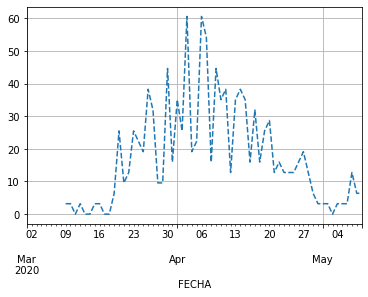

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
ktabla[kaxi[0].legendlabels[0]].plot(ax=ax,ls='--')
#display(kvalores)
#display(kindices)
#ax.plot(indices,kvalores.values,linestyle='--',c='k')
ax.plot(ktabla.index,ktabla[kaxi[0].legendlabels[0]],'-')
plt.grid()
#poblacion.loc[kaxi[0].legendlabels[0],'Value']

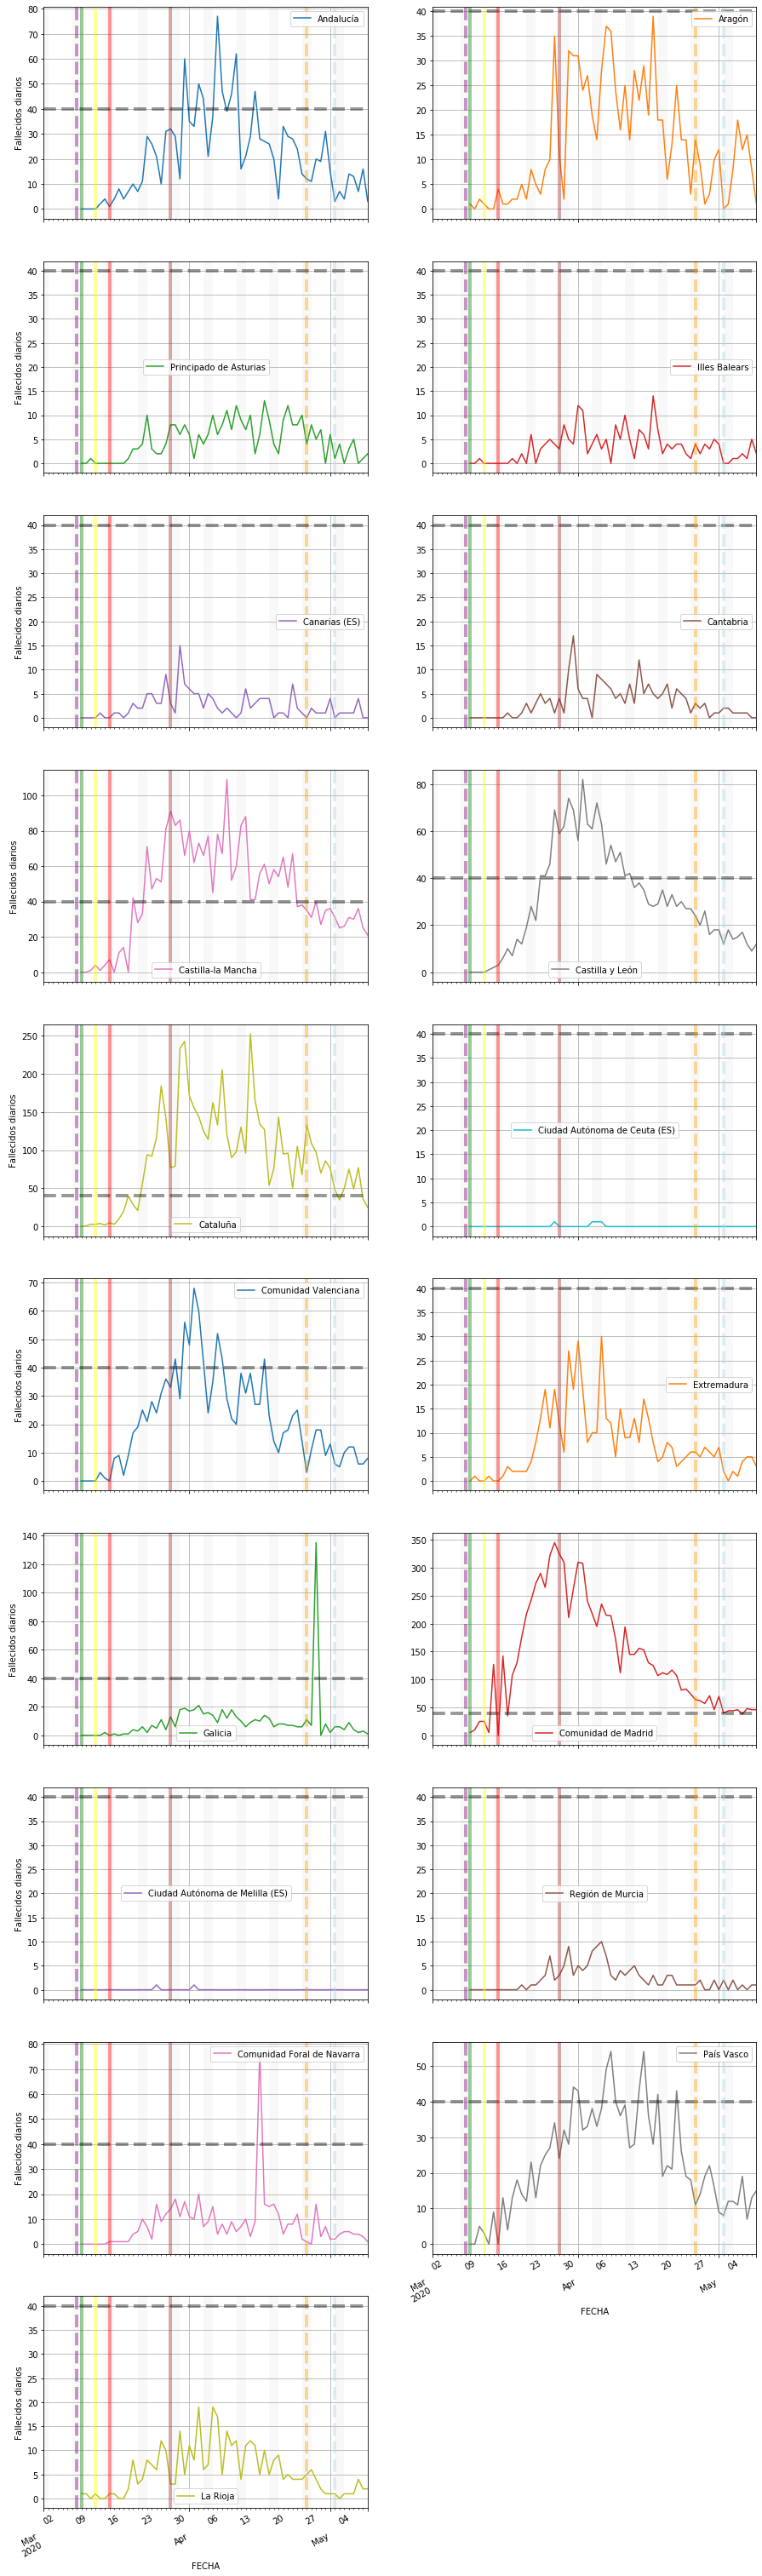

In [43]:
axes = datos.loc[idx['2020-03-01':,:]].DFallecidos.unstack(level=1).plot(subplots=True, 
                                                                grid=True,
                                                                figsize=(15, 60),
                                                                layout=(10, 2))
for kaxi in axes:
    try:
        #print(kaxi[0].legendlabels,poblacion.at[kaxi[0].legendlabels[0],'GEO'])
        highlight_datetimes(weekend_indices, kaxi[0])
        kaxi[0].legend( [poblacion.at[kaxi[0].legendlabels[0],'GEO']])
        kaxi[0].set(ylabel='Fallecidos diarios')
        kaxi[0].axhline(y=40,ls='--',linewidth=4, color='k',alpha=.4)#,label='Manifestación y Vox')
        kaxi[1].axhline(y=40,ls='--',linewidth=4, color='k',alpha=.4)#,label='Manifestación y Vox')
        
        #print(kaxi[1].legendlabels,poblacion.at[kaxi[1].legendlabels[0],'GEO'])
        highlight_datetimes(weekend_indices, kaxi[1])
        kaxi[1].legend( [poblacion.at[kaxi[1].legendlabels[0],'GEO']])
    except:
        continue

plt.show()

In [38]:
owid_covid.columns

Index(['iso_code', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'tests_units', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [40]:
datos.loc[idx['2020-03-01':,:]]

CASOS     PCR+  TestAc+  Hospitalizados    UCI  Fallecidos  \
FECHA      CCAA                                                               
2020-03-01 AN      NaN     12.0      NaN             NaN    NaN         NaN   
           AR      NaN      0.0      NaN             NaN    NaN         NaN   
           AS      NaN      1.0      NaN             NaN    NaN         NaN   
           IB      NaN      2.0      NaN             NaN    NaN         NaN   
           CN      NaN      7.0      NaN             NaN    NaN         NaN   
...                ...      ...      ...             ...    ...         ...   
2020-05-09 ML      NaN    119.0     13.0            44.0    3.0         2.0   
           MC      NaN   1508.0    821.0           662.0  113.0       139.0   
           NC      NaN   5052.0   2403.0          2023.0  135.0       488.0   
           PV      NaN  13156.0   4521.0          6902.0  571.0      1418.0   
           RI      NaN   4008.0   1370.0          1474.0   91.0       346.0   

                 Recuperados    Total  DTotal  DFallecidos  DRecuperados  
FECHA      CCAA                                                           
2020-03-01 AN            NaN     12.0     0.0          NaN           NaN  
           AR            NaN      0.0     0.0          NaN           NaN  
           AS            NaN      1.0     0.0          NaN           NaN  
           IB            NaN      2.0     0.0          NaN           NaN  
           CN            NaN      7.0     0.0          NaN           NaN  
...                      ...      ...     ...          ...           ...  
2020-05-09 ML          111.0    119.0     0.0          0.0           3.0  
           MC         1782.0   1508.0     2.0          1.0          15.0  
           NC         3014.0   5052.0    13.0          1.0          97.0  
           PV        14646.0  13156.0    45.0         15.0         661.0  
           RI         2648.0   4008.0     8.0          2.0          67.0  

[1330 rows x 11 columns]